<a href="https://colab.research.google.com/github/Paco-clod/CryptocurrencyPricePrediction/blob/main/CryptocurrencyPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cryptocurrency Price Prediction:

Dogecoin is the reason for the recent drop in bitcoin prices. The price of Dogecoin is currently very cheap compared to bitcoin, but some financial experts, including Tesla’s CEO Elon Musk, claiming that we will see a rise in the price of Dogecoin soon. So, if you want to learn how to predict the future prices of Dogecoin, this article is for you. In this article, I will walk you through the task of Dogecoin Price Prediction with Machine Learning using Python.

#Dogecoin Price Prediction using Python

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from seaborn import regression
import yfinance as yf

In [21]:
sns.set()
# Use the updated style name for seaborn-whitegrid
plt.style.use('seaborn-v0_8-whitegrid')

In [22]:
data = yf.download('DOGE-USD', start = '2020-01-01', end = '2024-06-21')

[*********************100%***********************]  1 of 1 completed


In [23]:
data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD
Date,,,,,,
2024-06-16,0.136937,0.136937,0.137347,0.134819,0.136576,385407083
2024-06-17,0.128889,0.128889,0.138023,0.126495,0.136940,960646592
2024-06-18,0.122296,0.122296,0.129103,0.115392,0.128866,1413960450
2024-06-19,0.122341,0.122341,0.126508,0.121579,0.122279,642487745
2024-06-20,0.124419,0.124419,0.128266,0.121454,0.122341,734399819


In this dataset, the “close” column contains the values whose future values that we want to predict, so let’s have a closer look at the historical values of close prices of Dogecoin:

In [27]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD
count,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1.633000e+03
mean,0.099070,0.099070,0.103956,0.094193,0.098983,1.422561e+09
std,0.094224,0.094224,0.101985,0.086574,0.094184,3.689465e+09
min,0.001537,0.001537,0.001612,0.001247,0.001540,2.275453e+07
25%,0.050262,0.050262,0.052407,0.048029,0.050138,1.988030e+08
50%,0.075444,0.075444,0.077496,0.073162,0.075319,4.858424e+08
75%,0.142640,0.142640,0.147391,0.137250,0.142626,1.260948e+09
max,0.684777,0.684777,0.737567,0.608168,0.687801,6.941068e+10


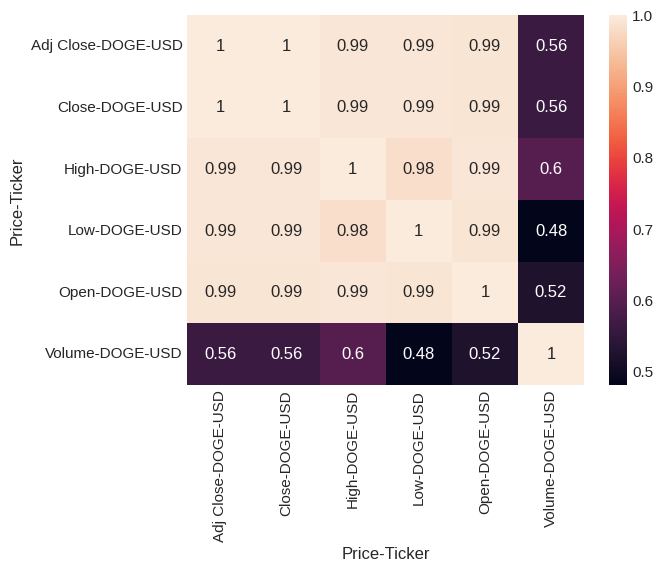

In [30]:
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

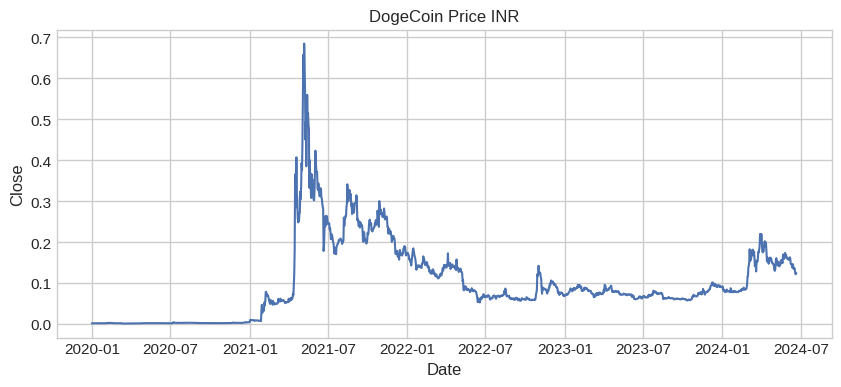

In [25]:
data.dropna()
plt.figure(figsize=(10, 4))
plt.title("DogeCoin Price INR")
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(data["Close"])
plt.show()

Now I will be using the autots library in Python to train a machine learning model for predicting the future prices of Dogecoin. If you have never used this library before then you can easily install it in your system by using the pip command:

In [26]:
pip install autots

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.7/953.7 kB 13.0 MB/s eta 0:00:00


Now I will be using the autots library in Python to train a machine learning model for predicting the future prices of Dogecoin. If you have never used this library before then you can easily install it in your system by using the pip command:

In [34]:
data.dtypes

,,0
Price,Ticker,
Date,,datetime64[ns]
Adj Close,DOGE-USD,float64
Close,DOGE-USD,float64
High,DOGE-USD,float64
Low,DOGE-USD,float64
Open,DOGE-USD,float64
Volume,DOGE-USD,int64


In [35]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD,DOGE-USD
0,2020-01-01,0.002033,0.002033,0.002052,0.002021,0.002028,51180941
1,2020-01-02,0.002009,0.002009,0.002110,0.001983,0.002034,65071106
2,2020-01-03,0.002145,0.002145,0.002177,0.001991,0.002008,62619988
3,2020-01-04,0.002241,0.002241,0.002490,0.002050,0.002144,94227582
4,2020-01-05,0.002419,0.002419,0.002491,0.002117,0.002240,52631740


In [37]:
data = data.reset_index()

In [38]:
data.columns = [col[0] if isinstance(col, tuple) else col for col in data.columns]

In [39]:
data.columns

Index(['index', 'Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [40]:
data

,index,Date,Adj Close,Close,High,Low,Open,Volume
0,0,2020-01-01,0.002033,0.002033,0.002052,0.002021,0.002028,51180941
1,1,2020-01-02,0.002009,0.002009,0.002110,0.001983,0.002034,65071106
2,2,2020-01-03,0.002145,0.002145,0.002177,0.001991,0.002008,62619988
3,3,2020-01-04,0.002241,0.002241,0.002490,0.002050,0.002144,94227582
4,4,2020-01-05,0.002419,0.002419,0.002491,0.002117,0.002240,52631740
...,...,...,...,...,...,...,...,...
1628,1628,2024-06-16,0.136937,0.136937,0.137347,0.134819,0.136576,385407083
1629,1629,2024-06-17,0.128889,0.128889,0.138023,0.126495,0.136940,960646592
1630,1630,2024-06-18,0.122296,0.122296,0.129103,0.115392,0.128866,1413960450
1631,1631,2024-06-19,0.122341,0.122341,0.126508,0.121579,0.122279,642487745


In [41]:
from autots import AutoTS
model = AutoTS(forecast_length=10, frequency='infer', ensemble='simple', drop_data_older_than_periods=200)
model = model.fit(data, date_col='Date', value_col='Close', id_col=None)

prediction = model.predict()

Using 1 cpus for n_jobs.
Data frequency is: D, used frequency is: D
Old data dropped by `drop_data_older_than_periods`.
Model Number: 1 with model AverageValueNaive in generation 0 of 25
Model Number: 2 with model AverageValueNaive in generation 0 of 25
Model Number: 3 with model AverageValueNaive in generation 0 of 25
Model Number: 4 with model DatepartRegression in generation 0 of 25
Model Number: 5 with model DatepartRegression in generation 0 of 25
Model Number: 6 with model DatepartRegression in generation 0 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 7 with model DatepartRegression in generation 0 of 25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.4744
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4628 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4617 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4586 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4535 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4450 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4464 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4351 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4277
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4104 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3901  
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3750 
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3444 
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3062 
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2830 
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Model Number: 25 with model FBProphet in generation 0 of 25


DEBUG:cmdstanpy:input tempfile: /tmp/tmp4i0wuy5_/n3b2haz4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp4i0wuy5_/7yo_y5d3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17733', 'data', 'file=/tmp/tmp4i0wuy5_/n3b2haz4.json', 'init=/tmp/tmp4i0wuy5_/7yo_y5d3.json', 'output', 'file=/tmp/tmp4i0wuy5_/prophet_modelifkbw8wd/prophet_model-20241220175508.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:55:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model Number: 26 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 26 in generation 0: DatepartRegression
Model Number: 27 with model SeasonalNaive in generation 0 of 25
Model Number: 28 with model DatepartRegression in generation 0 of 25
Model Number: 29 with model ETS in generation 0 of 25
Model Number: 30 with model ARDL in generation 0 of 25
Model Number: 31 with model UnivariateMotif in generation 0 of 25
Model Number: 32 with model UnivariateMotif in generation 0 of 25
Model Number: 33 with model SectionalMotif in generation 0 of 25
Model Number: 34 with model SectionalMotif in generation 0 of 25
Model Number: 35 with model FBProphet in generation 0 of 25
Model Number: 36 with model SeasonalNaive in generation 0 of 25
Model Number: 37 with model DatepartRegression in generation 0 of 25
Model Number: 38 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` p

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Template Eval Error: ValueError('transformed data is all zeroes') in model 41 in generation 0: Cassandra
Model Number: 42 with model Cassandra in generation 0 of 25
Model Number: 43 with model Cassandra in generation 0 of 25
Model Number: 44 with model SectionalMotif in generation 0 of 25
Model Number: 45 with model FBProphet in generation 0 of 25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 46 with model ARDL in generation 0 of 25
Model Number: 47 with model FFT in generation 0 of 25
Model Number: 48 with model BasicLinearModel in generation 0 of 25
Model Number: 49 with model BasicLinearModel in generation 0 of 25
Model Number: 50 with model SeasonalityMotif in generation 0 of 25
Model Number: 51 with model ETS in generation 0 of 25
Model Number: 52 with model FBProphet in generation 0 of 25


17:55:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 53 with model GLM in generation 0 of 25
Model Number: 54 with model UnivariateMotif in generation 0 of 25
Model Number: 55 with model ARDL in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 55 in generation 0: ARDL
Model Number: 56 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 56 in generation 0: ARCH
Model Number: 57 with model ConstantNaive in generation 0 of 25
Model Number: 58 with model LastValueNaive in generation 0 of 25
Model Number: 59 with model AverageValueNaive in generation 0 of 25
Model Number: 60 with model GLS in generation 0 of 25
Model Number: 61 with model SeasonalNaive in generation 0 of 25
Model Number: 62 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 62 in generation 0: VAR
Model Number: 63 with model WindowRegression in generation 0 of 2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 64 with model DatepartRegression in generation 0 of 25
Model Number: 65 with model SectionalMotif in generation 0 of 25
Model Number: 66 with model RRVAR in generation 0 of 25
Model Number: 67 with model MetricMotif in generation 0 of 25
Model Number: 68 with model Cassandra in generation 0 of 25
Template Eval Error: ValueError('Shape of passed values is (190, 2), indices imply (190, 1)') in model 68 in generation 0: Cassandra
Model Number: 69 with model SeasonalityMotif in generation 0 of 25
Model Number: 70 with model FFT in generation 0 of 25
Model Number: 71 with model BasicLinearModel in generation 0 of 25
Model Number: 72 with model SectionalMotif in generation 0 of 25
Model Number: 73 with model ARDL in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 73 in generation 0: ARDL
Model Number: 74 with model SeasonalityMotif in generation 0 of 25
Model Number: 75 with model MetricMotif in generation 

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


Model Number: 89 with model VAR in generation 0 of 25
Template Eval Error: LinAlgError('2-th leading minor of the array is not positive definite') in model 89 in generation 0: VAR
Model Number: 90 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 90 in generation 0: VAR
Model Number: 91 with model FBProphet in generation 0 of 25
Model Number: 92 with model SeasonalityMotif in generation 0 of 25
Model Number: 93 with model GLS in generation 0 of 25
Model Number: 94 with model GLM in generation 0 of 25
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 94 in generation 0: GLM
Model Number: 95 with model GLM in generation 0 of 25
Model Number: 96 with model LastValueNaive in generation 0 of 25
Model Number: 97 with model VAR in generation 0 of 25
Template Eval Error: ValueError('Only gave one variable to VAR') in model 97 in generation 0: VAR
Model Number: 98 with model ETS in generat

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 99 with model Cassandra in generation 0 of 25
Model Number: 100 with model SeasonalityMotif in generation 0 of 25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 101 with model SectionalMotif in generation 0 of 25
Model Number: 102 with model GLS in generation 0 of 25
Model Number: 103 with model GLS in generation 0 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params zero {\'0\': {\'method\': \'clip\', \'std_threshold\': 3, \'fillna\': None}, \'1\': {\'model\': \'GLS\', \'phi\': 1, \'window\': None, \'transform_dict\': None}, \'2\': {\'whiten\': True, \'n_components\': 10}, \'3\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'mean\'}} with error ValueError("n_components=10 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 103 in generation 0: GLS
Model Number: 104 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 104 in generation 0: ARCH
Model Number: 105 with model SeasonalityMotif

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.817e+01, tolerance: 1.897e-02
  model = cd_fast.enet_coordinate_descent(


Model Number: 115 with model MetricMotif in generation 0 of 25
Model Number: 116 with model UnivariateMotif in generation 0 of 25
Model Number: 117 with model WindowRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 117 in generation 0: WindowRegression
Model Number: 118 with model UnivariateMotif in generation 0 of 25
Model Number: 119 with model ETS in generation 0 of 25
Model Number: 120 with model LastValueNaive in generation 0 of 25
Model Number: 121 with model Cassandra in generation 0 of 25
Model Number: 122 with model SectionalMotif in generation 0 of 25
Model Number: 123 with model DatepartRegression in generation 0 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 123 in generation 0: DatepartRegression
Model Number: 124 with model GLM in generation 0 of 25
Model Number: 125 with model LastValueNaive in generation 0 of 25
Model Number: 126 with

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Template Eval Error: LightGBMError('[tweedie]: at least one target label is negative') in model 136 in generation 0: WindowRegression
Model Number: 137 with model ARDL in generation 0 of 25
Model Number: 138 with model GLS in generation 0 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Model Number: 139 with model ARDL in generation 0 of 25
Model Number: 140 with model RRVAR in generation 0 of 25
Model Number: 141 with model SeasonalityMotif in generation 0 of 25
Model Number: 142 with model MetricMotif in generation 0 of 25
Model Number: 143 with model ETS in generation 0 of 25
Model Number: 144 with model ConstantNaive in generation 0 of 25
Model Number: 145 with model UnivariateMotif in generation 0 of 25
Model Number: 146 with model ETS in generation 0 of 25
Model Number: 147 with model FFT in generation 0 of 25
Model Number: 148 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 148 in generation 0: ARCH
Model Number: 149 with model GLM in generation 0 of 25
Model Number: 150 with model ARCH in generation 0 of 25
Template Eval Error: ImportError('`arch` package must be installed from pip') in model 150 in generation 0: ARCH
Model Number: 151 with model ConstantNaive in generation 0 of 25
M

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 159 with model UnivariateMotif in generation 1 of 25
Model Number: 160 with model ETS in generation 1 of 25
Model Number: 161 with model GLM in generation 1 of 25
Model Number: 162 with model MetricMotif in generation 1 of 25
Model Number: 163 with model FFT in generation 1 of 25
Model Number: 164 with model Cassandra in generation 1 of 25
Model Number: 165 with model DatepartRegression in generation 1 of 25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 166 with model ConstantNaive in generation 1 of 25
Model Number: 167 with model UnivariateMotif in generation 1 of 25
Model Number: 168 with model LastValueNaive in generation 1 of 25
Model Number: 169 with model DatepartRegression in generation 1 of 25
Model Number: 170 with model MetricMotif in generation 1 of 25
Model Number: 171 with model GLS in generation 1 of 25
Model Number: 172 with model SeasonalityMotif in generation 1 of 25
Model Number: 173 with model GLS in generation 1 of 25
Model Number: 174 with model DatepartRegression in generation 1 of 25
Model Number: 175 with model DatepartRegression in generation 1 of 25
Model Number: 176 with model GLM in generation 1 of 25
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 176 in generation 1: GLM
Model Number: 177 with model DatepartRegression in generation 1 of 25
Template Eval Error: ValueError("regressi

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 181 with model SeasonalNaive in generation 1 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params linear {'0': {}, '1': {'decomp_type': 'seasonal_decompose', 'part': 'trend'}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}} with error ValueError('BTCD only works on multivarate series')") in model 181 in generation 1: SeasonalNaive
Model Number: 182 with model FBProphet in generation 1 of 25
Model Number: 183 with model FBProphet in generation 1 of 25
Model Number: 184 with model SeasonalNaive in generation 1 of 25
Model Number: 185 with model UnivariateMotif in generation 1 of 25
Model Number: 186 with model UnivariateMotif in generation 1 of 25
Model Number: 187 with model SectionalMotif in generation 1 of 25
Model Number: 188 with model GLS in generation 1 of 25
Model Number: 189 with model ARDL in generation 1 of 25
Model Number: 190 with model GLS in generation 1 of 25
Model Number: 191 with model Basic

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 254 in generation 1: ARDL
Model Number: 255 with model AverageValueNaive in generation 1 of 25
Model Number: 256 with model AverageValueNaive in generation 1 of 25
Model Number: 257 with model SeasonalityMotif in generation 1 of 25
Template Eval Error: Exception('Transformer DatepartRegression failed on fit from params quadratic {\'0\': {\'rows\': 1, \'lag\': 7, \'method\': \'additive\', \'strength\': 1.0, \'first_value_only\': False, \'threshold\': 1, \'threshold_method\': \'mean\'}, \'1\': {}, \'2\': {\'regression_model\': {\'model\': \'MLP\', \'model_params\': {\'hidden_layer_sizes\': [2560], \'max_iter\': 250, \'activation\': \'tanh\', \'solver\': \'sgd\', \'early_stopping\': True, \'learning_rate_init\': 0.001, \'alpha\': None}}, \'datepart_method\': \'simple_binarized\', \'polynomial_degree\': None, \'transform_dict\': {\'fillna\': \'ffill\', \'transformations\': {\'0\': \'ClipOut

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 272 with model ETS in generation 2 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params fake_date {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '1': {}, '2': {'numtaps': 512, 'cutoff_hz': 100, 'window': 'taylor', 'sampling_frequency': 12, 'on_transform': True, 'on_inverse': False}, '3': {}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 272 in generation 2: ETS
Model Number: 273 with model ConstantNaive in generation 2 of 25
Model Number: 274 with model DatepartRegression in generation 2 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 274 in generation 2: DatepartRegression
Model Number: 275 with model FBProphet in generation 2 of 25


17:55:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 276 with model FBProphet in generation 2 of 25
Model Number: 277 with model FFT in generation 2 of 25
Model Number: 278 with model UnivariateMotif in generation 2 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params time {'0': {'lag': 1, 'fill': 'bfill'}, '1': {}, '2': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'max'}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '4': {'lag_1': 364, 'method': 5}} with error ValueError('cannot reshape array of size 190 into shape (0,364,newaxis)')") in model 278 in generation 2: UnivariateMotif
Model Number: 279 with model SeasonalNaive in generation 2 of 25
Model Number: 280 with model LastValueNaive in generation 2 of 25
Model Number: 281 with model ETS in generation 2 of 25
Model Number: 282 with model FBProphet in ge

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:445: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 294 with model SeasonalNaive in generation 2 of 25
Model Number: 295 with model ETS in generation 2 of 25
Model Number: 296 with model ARDL in generation 2 of 25
Model Number: 297 with model AverageValueNaive in generation 2 of 25
Model Number: 298 with model AverageValueNaive in generation 2 of 25
Model Number: 299 with model SeasonalityMotif in generation 2 of 25
Model Number: 300 with model ARDL in generation 2 of 25
Model Number: 301 with model BasicLinearModel in generation 2 of 25
Model Number: 302 with model SeasonalityMotif in generation 2 of 25
Model Number: 303 with model DatepartRegression in generation 2 of 25
Model Number: 304 with model MetricMotif in generation 2 of 25
Model Number: 305 with model RRVAR in generation 2 of 25
Model Number: 306 with model SeasonalNaive in generation 2 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params zero {'0': {'rows': 1, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': None}, 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 310 with model GLS in generation 2 of 25
Model Number: 311 with model UnivariateMotif in generation 2 of 25
Model Number: 312 with model SeasonalNaive in generation 2 of 25
Model Number: 313 with model SeasonalityMotif in generation 2 of 25
Model Number: 314 with model GLM in generation 2 of 25
Model Number: 315 with model BasicLinearModel in generation 2 of 25
Model Number: 316 with model LastValueNaive in generation 2 of 25
Model Number: 317 with model Cassandra in generation 2 of 25


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 318 with model RRVAR in generation 2 of 25
Model Number: 319 with model DatepartRegression in generation 2 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 319 in generation 2: DatepartRegression
Model Number: 320 with model ETS in generation 2 of 25
Model Number: 321 with model SectionalMotif in generation 2 of 25
Model Number: 322 with model UnivariateMotif in generation 2 of 25
Model Number: 323 with model UnivariateMotif in generation 2 of 25
Model Number: 324 with model GLM in generation 2 of 25
Model Number: 325 with model ConstantNaive in generation 2 of 25
Model Number: 326 with model SeasonalityMotif in generation 2 of 25
Model Number: 327 with model FBProphet in generation 2 of 25
Model Number: 328 with model UnivariateMotif in generation 2 of 25
Model Number: 329 with model AverageValueNaive in generation 2 of 25
Model Number: 330 with model BasicLinearModel in generation 2 of 25
Model Number: 331 with mode

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_a

Model Number: 341 with model FBProphet in generation 2 of 25
Model Number: 342 with model GLS in generation 2 of 25
Model Number: 343 with model ARDL in generation 2 of 25
Model Number: 344 with model SectionalMotif in generation 2 of 25
Model Number: 345 with model LastValueNaive in generation 2 of 25
Model Number: 346 with model FFT in generation 2 of 25
Model Number: 347 with model GLS in generation 2 of 25
Model Number: 348 with model RRVAR in generation 2 of 25
Model Number: 349 with model RRVAR in generation 2 of 25
Model Number: 350 with model AverageValueNaive in generation 2 of 25
Model Number: 351 with model ETS in generation 2 of 25
Model Number: 352 with model MetricMotif in generation 2 of 25
Model Number: 353 with model SeasonalityMotif in generation 2 of 25
Model Number: 354 with model BasicLinearModel in generation 2 of 25
Model Number: 355 with model GLS in generation 2 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 356 with model ETS in generation 2 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params zero {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 3, 'threshold_method': 'mean'}} with error ValueError('BTCD only works on multivarate series')") in model 356 in generation 2: ETS
Model Number: 357 with model SeasonalityMotif in generation 2 of 25
Model Number: 358 with model SeasonalNaive in generation 2 of 25
Model Number: 359 with model SectionalMotif in generation 2 of 25
Model Number: 360 with model FFT in generation 2 of 25
Model Number: 361 with model GLS in generation 2 of 25
Model Number: 362 with model FFT in generation 2 of 25
Model Number: 363 with model LastValueNaive in generation 2 of 25
Model Number: 364 with model AverageValueNaive in generation 2 of 25
Model Number: 365 with model AverageValueN

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 422 with model RRVAR in generation 3 of 25
Model Number: 423 with model MetricMotif in generation 3 of 25
Model Number: 424 with model UnivariateMotif in generation 3 of 25
Model Number: 425 with model SeasonalityMotif in generation 3 of 25
Model Number: 426 with model ARDL in generation 3 of 25
Model Number: 427 with model FBProphet in generation 3 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {'model': 'GLS', 'phi': 1, 'window': 365, 'transform_dict': None}, '1': {'lag_1': 364, 'method': 20}, '2': {'algorithm': 'parallel', 'fun': 'logcosh', 'max_iter': 250, 'whiten': 'unit-variance'}, '3': {'constraint_method': 'stdev_min', 'constraint_direction': 'upper', 'constraint_regularization': 1.0, 'constraint_value': 3.0, 'bounds_only': False, 'fillna': None}, '4': {'numtaps': 32, 'cutoff_hz': 20, 'window': 'tukey', 'sampling_frequency': 7, 'on_transform': False, 'on_inverse': True}} with error ValueError('cannot resh

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 442 with model DatepartRegression in generation 3 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 442 in generation 3: DatepartRegression
Model Number: 443 with model SectionalMotif in generation 3 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'colsample_bylevel': 0.54, 'learning_rate': 0.0125, 'max_depth': 11, 'min_child_weight': 0.0127203, 'n_estimators': 319}, 'datepart_method': 'simple_binarized'}, 'fillna': 'akima'}, '1': {'rows': 1, 'lag': 28, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'lag': 1, 'fill': 'zero'}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]')") in model 443 in generation 3: SectionalMotif
Model Number: 444 with mod

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


Model Number: 518 with model DatepartRegression in generation 4 of 25
Template Eval Error: IndexError('tuple index out of range') in model 518 in generation 4: DatepartRegression
Model Number: 519 with model SeasonalityMotif in generation 4 of 25
Model Number: 520 with model RRVAR in generation 4 of 25
Model Number: 521 with model SectionalMotif in generation 4 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 521 in generation 4: SectionalMotif
Model Number: 522 with model ConstantNaive in generation 4 of 25
Model Number: 523 with model GLM in generation 4 of 25
Model Number: 524 with model SectionalMotif in generation 4 of 25
Model Number: 525 with model SeasonalityMotif in generation 4 of 25
Model Number: 526 with model LastValueNaive in generation 4 of 25
Model Number: 527 with model FBProphet in generation 4 of 25
Model Number: 528 with model MetricMotif in generation 4 of 25
Template Eval Error: ZeroDivisionError("Weights s

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 535 with model ETS in generation 4 of 25
Model Number: 536 with model ETS in generation 4 of 25
Model Number: 537 with model RRVAR in generation 4 of 25
Model Number: 538 with model SeasonalityMotif in generation 4 of 25
Model Number: 539 with model GLM in generation 4 of 25
Model Number: 540 with model MetricMotif in generation 4 of 25
Model Number: 541 with model MetricMotif in generation 4 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 542 with model BasicLinearModel in generation 4 of 25
Model Number: 543 with model WindowRegression in generation 4 of 25
Model Number: 544 with model MetricMotif in generation 4 of 25
Model Number: 545 with model ConstantNaive in generation 4 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params time {'0': {'part': 'trend', 'lamb': 129600}, '1': {}, '2': {'window_size': 90, 'alpha': 3.0, 'grouping_forward_limit': 4, 'max_level_shifts': 5, 'alignment': 'rolling_diff'}, '3': {'det_order': 1, 'k_ar_diff': 0}, '4': {}, '5': {'span': 4}} with error ValueError('Coint only works on multivarate series')") in model 545 in generation 4: ConstantNaive
Model Number: 546 with model LastValueNaive in generation 4 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 547 with model GLS in generation 4 of 25
Model Number: 548 with model ETS in generation 4 of 25
Model Number: 549 with model RRVAR in generation 4 of 25
Model Number: 550 with model ConstantNaive in generation 4 of 25
Model Number: 551 with model RRVAR in generation 4 of 25
Model Number: 552 with model UnivariateMotif in generation 4 of 25
Model Number: 553 with model FBProphet in generation 4 of 25
Model Number: 554 with model GLS in generation 4 of 25
Model Number: 555 with model AverageValueNaive in generation 4 of 25
Model Number: 556 with model ARDL in generation 4 of 25
Model Number: 557 with model UnivariateMotif in generation 4 of 25
Model Number: 558 with model MetricMotif in generation 4 of 25
Model Number: 559 with model GLM in generation 4 of 25
Model Number: 560 with model FBProphet in generation 4 of 25
Model Number: 561 with model SeasonalNaive in generation 4 of 25
Model Number: 562 with model AverageValueNaive in generation 4 of 25
Model Number: 563 with 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.289e-02, tolerance: 2.092e-02
  model = cd_fast.enet_coordinate_descent(


Model Number: 621 with model SectionalMotif in generation 5 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 621 in generation 5: SectionalMotif
Model Number: 622 with model SeasonalityMotif in generation 5 of 25
Model Number: 623 with model SeasonalNaive in generation 5 of 25
Model Number: 624 with model SeasonalityMotif in generation 5 of 25
Model Number: 625 with model SectionalMotif in generation 5 of 25
Model Number: 626 with model AverageValueNaive in generation 5 of 25
Model Number: 627 with model MetricMotif in generation 5 of 25
Model Number: 628 with model SectionalMotif in generation 5 of 25
Model Number: 629 with model GLS in generation 5 of 25
Model Number: 630 with model MetricMotif in generation 5 of 25
Model Number: 631 with model LastValueNaive in generation 5 of 25
Model Number: 632 with model SectionalMotif in generation 5 of 25
Model Number: 633 with model RRVAR in generation 5 of 25
Model Number: 634 with mo

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 648 with model AverageValueNaive in generation 5 of 25
Model Number: 649 with model LastValueNaive in generation 5 of 25
Model Number: 650 with model GLS in generation 5 of 25
Model Number: 651 with model BasicLinearModel in generation 5 of 25
Model Number: 652 with model RRVAR in generation 5 of 25
Model Number: 653 with model SeasonalNaive in generation 5 of 25
Model Number: 654 with model ARDL in generation 5 of 25
Model Number: 655 with model SeasonalityMotif in generation 5 of 25
Model Number: 656 with model DatepartRegression in generation 5 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 656 in generation 5: DatepartRegression
Model Number: 657 with model LastValueNaive in generation 5 of 25
Model Number: 658 with model AverageValueNaive in generation 5 of 25
Model Number: 659 with model MetricMotif in generation 5 of 25
New Generation: 6 of 25
Model Number: 660 with model SeasonalityMotif in generation 6 of 2

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 708 with model DatepartRegression in generation 6 of 25
Model Number: 709 with model SeasonalityMotif in generation 6 of 25
Model Number: 710 with model ARDL in generation 6 of 25
Model Number: 711 with model GLS in generation 6 of 25
Model Number: 712 with model AverageValueNaive in generation 6 of 25
Model Number: 713 with model LastValueNaive in generation 6 of 25
Model Number: 714 with model DatepartRegression in generation 6 of 25
Model Number: 715 with model MetricMotif in generation 6 of 25
Model Number: 716 with model GLM in generation 6 of 25
Model Number: 717 with model FBProphet in generation 6 of 25
Model Number: 718 with model LastValueNaive in generation 6 of 25
Model Number: 719 with model MetricMotif in generation 6 of 25
Model Number: 720 with model UnivariateMotif in generation 6 of 25
Model Number: 721 with model ETS in generation 6 of 25
Model Number: 722 with model DatepartRegression in generation 6 of 25
Model Number: 723 with model SeasonalNaive in 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 738 with model DatepartRegression in generation 6 of 25
Model Number: 739 with model ARDL in generation 6 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 739 in generation 6: ARDL
Model Number: 740 with model SeasonalNaive in generation 6 of 25
Model Number: 741 with model SeasonalNaive in generation 6 of 25
Model Number: 742 with model FBProphet in generation 6 of 25
Model Number: 743 with model GLS in generation 6 of 25
New Generation: 7 of 25
Model Number: 744 with model GLM in generation 7 of 25
Model Number: 745 with model AverageValueNaive in generation 7 of 25
Model Number: 746 with model RRVAR in generation 7 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


Model Number: 747 with model FBProphet in generation 7 of 25
Model Number: 748 with model DatepartRegression in generation 7 of 25
Model Number: 749 with model ARDL in generation 7 of 25
Model Number: 750 with model ETS in generation 7 of 25
Model Number: 751 with model SectionalMotif in generation 7 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 751 in generation 7: SectionalMotif
Model Number: 752 with model MetricMotif in generation 7 of 25
Model Number: 753 with model SeasonalNaive in generation 7 of 25
Model Number: 754 with model SectionalMotif in generation 7 of 25
Model Number: 755 with model RRVAR in generation 7 of 25
Model Number: 756 with model SeasonalityMotif in generation 7 of 25
Model Number: 757 with model LastValueNaive in generation 7 of 25
Model Number: 758 with model UnivariateMotif in generation 7 of 25
Model Number: 759 with model BasicLinearModel in generation 7 of 25
Model Number: 760 with model Metric

/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 776 with model UnivariateMotif in generation 7 of 25
Model Number: 777 with model DatepartRegression in generation 7 of 25
Model Number: 778 with model ConstantNaive in generation 7 of 25
Model Number: 779 with model FFT in generation 7 of 25
Model Number: 780 with model AverageValueNaive in generation 7 of 25
Model Number: 781 with model SectionalMotif in generation 7 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params ffill {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': 10, 'threshold_method': 'mean'}, '2': {'method': 100}} with error ValueError('BTCD only works on multivarate series')") in model 781 in generation 7: SectionalMotif
Model Number: 782 with model SeasonalNaive in generation 7 of 25
Model Number: 783 with model SectionalMotif in generation 7 of 25
Model Number: 784 with model DatepartRe

17:56:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
17:56:47 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 794 with model RRVAR in generation 7 of 25
Model Number: 795 with model MetricMotif in generation 7 of 25
Model Number: 796 with model DatepartRegression in generation 7 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 796 in generation 7: DatepartRegression
Model Number: 797 with model MetricMotif in generation 7 of 25
Model Number: 798 with model FBProphet in generation 7 of 25
Model Number: 799 with model MetricMotif in generation 7 of 25
Model Number: 800 with model ConstantNaive in generation 7 of 25
Model Number: 801 with model FBProphet in generation 7 of 25
Model Number: 802 with model SeasonalNaive in generation 7 of 25
Model Number: 803 with model SeasonalityMotif in generation 7 of 25
Model Number: 804 with model SeasonalNaive in generation 7 of 25
Model Number: 805 with model WindowRegression in generation 7 of 25
Model Number: 806 with model FBProphet in generation 7 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Model Number: 807 with model ARDL in generation 7 of 25
Model Number: 808 with model FBProphet in generation 7 of 25
Model Number: 809 with model UnivariateMotif in generation 7 of 25
Model Number: 810 with model DatepartRegression in generation 7 of 25
Model Number: 811 with model RRVAR in generation 7 of 25
Model Number: 812 with model UnivariateMotif in generation 7 of 25
Model Number: 813 with model BasicLinearModel in generation 7 of 25
Model Number: 814 with model ARDL in generation 7 of 25
Model Number: 815 with model GLS in generation 7 of 25
Model Number: 816 with model LastValueNaive in generation 7 of 25
Model Number: 817 with model GLS in generation 7 of 25
Model Number: 818 with model RRVAR in generation 7 of 25
Model Number: 819 with model AverageValueNaive in generation 7 of 25
Model Number: 820 with model SeasonalityMotif in generation 7 of 25
Model Number: 821 with model DatepartRegression in generation 7 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 822 with model GLM in generation 7 of 25
Model Number: 823 with model SectionalMotif in generation 7 of 25
Model Number: 824 with model MetricMotif in generation 7 of 25
Model Number: 825 with model LastValueNaive in generation 7 of 25
Model Number: 826 with model GLS in generation 7 of 25
Model Number: 827 with model SeasonalNaive in generation 7 of 25
New Generation: 8 of 25
Model Number: 828 with model MetricMotif in generation 8 of 25
Model Number: 829 with model FBProphet in generation 8 of 25
Model Number: 830 with model SeasonalityMotif in generation 8 of 25
Model Number: 831 with model LastValueNaive in generation 8 of 25
Model Number: 832 with model SeasonalityMotif in generation 8 of 25
Model Number: 833 with model MetricMotif in generation 8 of 25
Model Number: 834 with model SectionalMotif in generation 8 of 25
Model Number: 835 with model RRVAR in generation 8 of 25
Model Number: 836 with model ARDL in generation 8 of 25
Model Number: 837 with model Univariat

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 852 with model DatepartRegression in generation 8 of 25
Model Number: 853 with model RRVAR in generation 8 of 25
Model Number: 854 with model ARDL in generation 8 of 25
Model Number: 855 with model LastValueNaive in generation 8 of 25
Model Number: 856 with model UnivariateMotif in generation 8 of 25
Model Number: 857 with model SectionalMotif in generation 8 of 25
Model Number: 858 with model RRVAR in generation 8 of 25
Model Number: 859 with model DatepartRegression in generation 8 of 25
Model Number: 860 with model AverageValueNaive in generation 8 of 25
Model Number: 861 with model DatepartRegression in generation 8 of 25
Model Number: 862 with model ARDL in generation 8 of 25
Model Number: 863 with model RRVAR in generation 8 of 25
Model Number: 864 with model GLM in generation 8 of 25
Model Number: 865 with model FBProphet in generation 8 of 25
Model Number: 866 with model SeasonalityMotif in generation 8 of 25
Model Number: 867 with model FBProphet in generation 8 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Sta

Model Number: 892 with model ARDL in generation 8 of 25
Model Number: 893 with model SeasonalityMotif in generation 8 of 25
Model Number: 894 with model SeasonalityMotif in generation 8 of 25
Model Number: 895 with model RRVAR in generation 8 of 25
Model Number: 896 with model SeasonalityMotif in generation 8 of 25
Model Number: 897 with model GLS in generation 8 of 25
Model Number: 898 with model SectionalMotif in generation 8 of 25
Model Number: 899 with model RRVAR in generation 8 of 25
Model Number: 900 with model ConstantNaive in generation 8 of 25
Model Number: 901 with model MetricMotif in generation 8 of 25
Model Number: 902 with model GLS in generation 8 of 25
Model Number: 903 with model SectionalMotif in generation 8 of 25
Model Number: 904 with model UnivariateMotif in generation 8 of 25
Model Number: 905 with model WindowRegression in generation 8 of 25
Model Number: 906 with model GLM in generation 8 of 25
Model Number: 907 with model SeasonalNaive in generation 8 of 25
M

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 911 with model ARDL in generation 8 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params time {'0': {'det_order': -1, 'k_ar_diff': 2}, '1': {}} with error ValueError('Coint only works on multivarate series')") in model 911 in generation 8: ARDL
New Generation: 9 of 25
Model Number: 912 with model Cassandra in generation 9 of 25
Model Number: 913 with model AverageValueNaive in generation 9 of 25
Model Number: 914 with model DatepartRegression in generation 9 of 25
Model Number: 915 with model SectionalMotif in generation 9 of 25
Model Number: 916 with model SectionalMotif in generation 9 of 25
Model Number: 917 with model SeasonalityMotif in generation 9 of 25
Model Number: 918 with model UnivariateMotif in generation 9 of 25
Model Number: 919 with model LastValueNaive in generation 9 of 25
Model Number: 920 with model GLM in generation 9 of 25
Model Number: 921 with model ConstantNaive in generation 9 of 25
Model Number: 922 with mode

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 940 with model SeasonalityMotif in generation 9 of 25
Model Number: 941 with model SeasonalNaive in generation 9 of 25
Model Number: 942 with model DatepartRegression in generation 9 of 25
Model Number: 943 with model DatepartRegression in generation 9 of 25
Model Number: 944 with model BasicLinearModel in generation 9 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 944 in generation 9: BasicLinearModel
Model Number: 945 with model RRVAR in generation 9 of 25
Model Number: 946 with model SeasonalityMotif in generation 9 of 25
Model Number: 947 with model MetricMotif in generation 9 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 948 with model DatepartRegression in generation 9 of 25
Model Number: 949 with model SectionalMotif in generation 9 of 25
Model Number: 950 with model FBProphet in generation 9 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params cubic {'0': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '1': {'fixed': True, 'window': 2, 'macro_micro': False, 'center': False}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.3, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 5, 'multi_strategy': 'multi_output_tree', 'tree_method': 'hist'}, 'datepart_method': ['morlet_365.25_12_12', 'ricker_7_7_1']}, 'fillna': 'ffill'}, '3': {'rows': 84, 'lag': 84, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}} with error ValueError('Invalid classes inferred from unique v

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 958 with model SectionalMotif in generation 9 of 25
Model Number: 959 with model MetricMotif in generation 9 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params nearest {'0': {'det_order': -1, 'k_ar_diff': 1}, '1': {'lag': 1, 'fill': 'bfill'}, '2': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '3': {'rows': 1, 'lag': 1, 'method': 'multiplicative', 'strength': 0.5, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '4': {'fixed': True, 'window': 28, 'macro_micro': False, 'center': False}} with error ValueError('Coint only works on multivarate series')") in model 959 in generation 9: MetricMotif
Model Number: 960 with model GLM in generation 9 of 25
Model Number: 961 with model LastValueNaive in generation 9 of 25
Model Number: 962 with model FBProphet in generation 9 of 25


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


Model Number: 963 with model DatepartRegression in generation 9 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 963 in generation 9: DatepartRegression
Model Number: 964 with model SeasonalityMotif in generation 9 of 25
Model Number: 965 with model AverageValueNaive in generation 9 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 966 with model DatepartRegression in generation 9 of 25
Model Number: 967 with model SeasonalityMotif in generation 9 of 25
Model Number: 968 with model FBProphet in generation 9 of 25
Model Number: 969 with model GLS in generation 9 of 25
Model Number: 970 with model SeasonalityMotif in generation 9 of 25
Model Number: 971 with model ETS in generation 9 of 25
Model Number: 972 with model SeasonalityMotif in generation 9 of 25
Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 972 in generation 9: SeasonalityMotif
Model Number: 973 with model UnivariateMotif in generation 9 of 25
Model Number: 974 with model SectionalMotif in generation 9 of 25
Model Number: 975 with model UnivariateMotif in generation 9 of 25
Model Number: 976 with model FBProphet in generation 9 of 25


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


Model Number: 977 with model SeasonalityMotif in generation 9 of 25
Model Number: 978 with model MetricMotif in generation 9 of 25
Model Number: 979 with model FBProphet in generation 9 of 25
Model Number: 980 with model ARDL in generation 9 of 25
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 980 in generation 9: ARDL
Model Number: 981 with model AverageValueNaive in generation 9 of 25
Model Number: 982 with model BasicLinearModel in generation 9 of 25
Model Number: 983 with model WindowRegression in generation 9 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 983 in generation 9: WindowRegression
Model Number: 984 with model SeasonalityMotif in generation 9 of 25
Model Number: 985 with model SeasonalityMotif in generation 9 of 25
Model Number: 986 with model GLS in generation 9 of 25
Model Number: 987 with model ARDL in gener

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1004 with model UnivariateMotif in generation 10 of 25
Model Number: 1005 with model ARDL in generation 10 of 25
Model Number: 1006 with model MetricMotif in generation 10 of 25
Model Number: 1007 with model MetricMotif in generation 10 of 25
Model Number: 1008 with model SectionalMotif in generation 10 of 25
Model Number: 1009 with model GLS in generation 10 of 25
Model Number: 1010 with model UnivariateMotif in generation 10 of 25
Model Number: 1011 with model UnivariateMotif in generation 10 of 25
Model Number: 1012 with model SeasonalityMotif in generation 10 of 25
Model Number: 1013 with model SeasonalityMotif in generation 10 of 25
Model Number: 1014 with model RRVAR in generation 10 of 25
Model Number: 1015 with model SeasonalityMotif in generation 10 of 25
Model Number: 1016 with model SectionalMotif in generation 10 of 25
Model Number: 1017 with model GLS in generation 10 of 25
Model Number: 1018 with model SectionalMotif in generation 10 of 25
Model Number: 1019

17:57:21 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1026 with model SectionalMotif in generation 10 of 25
Model Number: 1027 with model FBProphet in generation 10 of 25
Model Number: 1028 with model MetricMotif in generation 10 of 25
Model Number: 1029 with model SeasonalityMotif in generation 10 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params cubic {'0': {'method': 'clip', 'std_threshold': 4, 'fillna': None}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': True, 'threshold': None, 'threshold_method': 'max'}, '2': {}, '3': {'model': 'Linear', 'phi': 1, 'window': None, 'transform_dict': {'fillna': None, 'transformations': {'0': 'ScipyFilter'}, 'transformation_params': {'0': {'method': 'savgol_filter', 'method_args': {'window_length': 31, 'polyorder': 3, 'deriv': 0, 'mode': 'interp'}}}}}, '4': {'constant': 1, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 0.692, 'learni

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1048 with model FBProphet in generation 10 of 25
Model Number: 1049 with model FBProphet in generation 10 of 25
Model Number: 1050 with model SectionalMotif in generation 10 of 25
Model Number: 1051 with model ARDL in generation 10 of 25
Model Number: 1052 with model LastValueNaive in generation 10 of 25
Model Number: 1053 with model AverageValueNaive in generation 10 of 25
Model Number: 1054 with model BasicLinearModel in generation 10 of 25
Model Number: 1055 with model SeasonalityMotif in generation 10 of 25
Model Number: 1056 with model UnivariateMotif in generation 10 of 25
Model Number: 1057 with model LastValueNaive in generation 10 of 25
Model Number: 1058 with model LastValueNaive in generation 10 of 25
New Generation: 11 of 25
Model Number: 1059 with model UnivariateMotif in generation 11 of 25
Model Number: 1060 with model AverageValueNaive in generation 11 of 25
Model Number: 1061 with model RRVAR in generation 11 of 25
Model Number: 1062 with model Univariate

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1066 with model SeasonalityMotif in generation 11 of 25
Model Number: 1067 with model UnivariateMotif in generation 11 of 25
Model Number: 1068 with model FBProphet in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1069 with model MetricMotif in generation 11 of 25
Model Number: 1070 with model BasicLinearModel in generation 11 of 25
Model Number: 1071 with model RRVAR in generation 11 of 25
Model Number: 1072 with model UnivariateMotif in generation 11 of 25
Model Number: 1073 with model ARDL in generation 11 of 25
Model Number: 1074 with model AverageValueNaive in generation 11 of 25
Model Number: 1075 with model RRVAR in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1076 with model UnivariateMotif in generation 11 of 25
Model Number: 1077 with model MetricMotif in generation 11 of 25
Model Number: 1078 with model SeasonalityMotif in generation 11 of 25
Model Number: 1079 with model SeasonalNaive in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1080 with model DatepartRegression in generation 11 of 25
Model Number: 1081 with model FBProphet in generation 11 of 25
Model Number: 1082 with model MetricMotif in generation 11 of 25
Model Number: 1083 with model RRVAR in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1084 with model ARDL in generation 11 of 25
Model Number: 1085 with model SectionalMotif in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1086 with model SeasonalityMotif in generation 11 of 25
Model Number: 1087 with model SectionalMotif in generation 11 of 25
Model Number: 1088 with model AverageValueNaive in generation 11 of 25
Model Number: 1089 with model UnivariateMotif in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: invalid value encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights


Model Number: 1090 with model AverageValueNaive in generation 11 of 25
Model Number: 1091 with model UnivariateMotif in generation 11 of 25
Model Number: 1092 with model RRVAR in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1093 with model AverageValueNaive in generation 11 of 25
Model Number: 1094 with model MetricMotif in generation 11 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill {\'0\': {\'whiten\': False, \'n_components\': 24}} with error ValueError("n_components=24 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 1094 in generation 11: MetricMotif
Model Number: 1095 with model ARDL in generation 11 of 25
Model Number: 1096 with model SeasonalityMotif in generation 11 of 25
Model Number: 1097 with model UnivariateMotif in generation 11 of 25
Model Number: 1098 with model ARDL in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1099 with model DatepartRegression in generation 11 of 25
Model Number: 1100 with model SeasonalityMotif in generation 11 of 25
Model Number: 1101 with model RRVAR in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1102 with model ARDL in generation 11 of 25
Model Number: 1103 with model FBProphet in generation 11 of 25
Model Number: 1104 with model SeasonalityMotif in generation 11 of 25
Model Number: 1105 with model SeasonalNaive in generation 11 of 25
Model Number: 1106 with model SeasonalityMotif in generation 11 of 25
Model Number: 1107 with model LastValueNaive in generation 11 of 25
Model Number: 1108 with model LastValueNaive in generation 11 of 25
Model Number: 1109 with model FBProphet in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1110 with model MetricMotif in generation 11 of 25
Model Number: 1111 with model ARDL in generation 11 of 25
Model Number: 1112 with model LastValueNaive in generation 11 of 25
Model Number: 1113 with model MetricMotif in generation 11 of 25
Model Number: 1114 with model AverageValueNaive in generation 11 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1115 with model FBProphet in generation 11 of 25
Model Number: 1116 with model ARDL in generation 11 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1116 in generation 11: ARDL
Model Number: 1117 with model FBProphet in generation 11 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params mean {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 2, 'eta': 0.05, 'min_child_weight': 10, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'n_estimators': 100}, 'datepart_method': 'common_fourier_rw'}, 'fillna': 'mean'}, '1': {'rows': 1, 'lag': 84, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]')") in model 1117 in generation 11: FBProp

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1125 with model DatepartRegression in generation 12 of 25
Template Eval Error: IndexError('tuple index out of range') in model 1125 in generation 12: DatepartRegression
Model Number: 1126 with model SeasonalNaive in generation 12 of 25
Model Number: 1127 with model DatepartRegression in generation 12 of 25
Model Number: 1128 with model UnivariateMotif in generation 12 of 25
Model Number: 1129 with model BasicLinearModel in generation 12 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1129 in generation 12: BasicLinearModel
Model Number: 1130 with model UnivariateMotif in generation 12 of 25
Model Number: 1131 with model RRVAR in generation 12 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1132 with model MetricMotif in generation 12 of 25
Model Number: 1133 with model UnivariateMotif in generation 12 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params time {'0': {}, '1': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'common_fourier'}, 'fillna': 'akima'}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '4': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '5': {}} with error ValueError('The number of classes has to be greater than one; got 1 class')") in model 1133 in generation 12: UnivariateMotif
Model Number: 1134 with model RRVAR in generation 12 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1135 with model SectionalMotif in generation 12 of 25
Model Number: 1136 with model FBProphet in generation 12 of 25
Model Number: 1137 with model FBProphet in generation 12 of 25
Model Number: 1138 with model MetricMotif in generation 12 of 25
Model Number: 1139 with model SeasonalityMotif in generation 12 of 25
Model Number: 1140 with model MetricMotif in generation 12 of 25
Model Number: 1141 with model SectionalMotif in generation 12 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1142 with model GLS in generation 12 of 25
Model Number: 1143 with model UnivariateMotif in generation 12 of 25
Model Number: 1144 with model SeasonalNaive in generation 12 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1145 with model LastValueNaive in generation 12 of 25
Model Number: 1146 with model ARDL in generation 12 of 25
Model Number: 1147 with model DatepartRegression in generation 12 of 25
Model Number: 1148 with model MetricMotif in generation 12 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1149 with model MetricMotif in generation 12 of 25
Model Number: 1150 with model AverageValueNaive in generation 12 of 25
Model Number: 1151 with model ARDL in generation 12 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params rolling_mean {\'0\': {\'rolling_window\': 180, \'n_tails\': 0.1, \'n_future\': 0.2, \'method\': \'mean\', \'macro_micro\': False}, \'1\': {}, \'2\': {}, \'3\': {}, \'4\': {\'constant\': 0, \'reintroduction_model\': {\'model\': \'KNN\', \'model_params\': {\'n_neighbors\': 5, \'weights\': \'uniform\', \'p\': 2, \'leaf_size\': 30}, \'datepart_method\': \'expanded\'}, \'fillna\': \'akima\'}, \'5\': {\'whiten\': False, \'n_components\': 24}} with error ValueError("n_components=24 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 1151 in generation 12: ARDL
Model Number: 1152 with model ARDL in generation 12 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1153 with model FBProphet in generation 12 of 25
Model Number: 1154 with model LastValueNaive in generation 12 of 25
Model Number: 1155 with model UnivariateMotif in generation 12 of 25
Model Number: 1156 with model ARDL in generation 12 of 25
Model Number: 1157 with model SectionalMotif in generation 12 of 25
Model Number: 1158 with model AverageValueNaive in generation 12 of 25
Model Number: 1159 with model UnivariateMotif in generation 12 of 25
Model Number: 1160 with model FBProphet in generation 12 of 25
Model Number: 1161 with model FBProphet in generation 12 of 25
Model Number: 1162 with model MetricMotif in generation 12 of 25
Model Number: 1163 with model FBProphet in generation 12 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1164 with model GLS in generation 12 of 25
Model Number: 1165 with model UnivariateMotif in generation 12 of 25
Model Number: 1166 with model LastValueNaive in generation 12 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1167 with model ARDL in generation 12 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1167 in generation 12: ARDL
Model Number: 1168 with model UnivariateMotif in generation 12 of 25
Model Number: 1169 with model FBProphet in generation 12 of 25
Model Number: 1170 with model MetricMotif in generation 12 of 25
Model Number: 1171 with model BasicLinearModel in generation 12 of 25
Model Number: 1172 with model SeasonalityMotif in generation 12 of 25
Model Number: 1173 with model BasicLinearModel in generation 12 of 25
Model Number: 1174 with model FBProphet in generation 12 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {}, '1': {}, '2': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '4': {'constant': 0, 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1177 with model GLS in generation 12 of 25
Model Number: 1178 with model UnivariateMotif in generation 12 of 25
Model Number: 1179 with model RRVAR in generation 12 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1180 with model ARDL in generation 12 of 25
Model Number: 1181 with model ARDL in generation 12 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1181 in generation 12: ARDL
Model Number: 1182 with model SectionalMotif in generation 12 of 25
Model Number: 1183 with model AverageValueNaive in generation 12 of 25
Model Number: 1184 with model SeasonalityMotif in generation 12 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params cubic {'0': {'sigma': 2, 'rolling_window': 90, 'run_order': 'season_first', 'regression_params': {'regression_model': {'model': 'ElasticNet', 'model_params': {'l1_ratio': 0.5, 'fit_intercept': True, 'selection': 'cyclic', 'max_iter': 1000}}, 'datepart_method': 'simple_2', 'polynomial_degree': 2, 'transform_dict': None, 'holiday_countries_used': True, 'lags': None, 'forward_lags': None}, 'holiday_params': {'threshold': 1.0, 'splash_threshold': None, 'use_dayo

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.387e-02, tolerance: 3.037e-05
  model = cd_fast.enet_coordinate_descent(


Model Number: 1185 with model SeasonalNaive in generation 13 of 25
Model Number: 1186 with model LastValueNaive in generation 13 of 25
Model Number: 1187 with model UnivariateMotif in generation 13 of 25
Model Number: 1188 with model DatepartRegression in generation 13 of 25
Model Number: 1189 with model UnivariateMotif in generation 13 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1190 with model SeasonalityMotif in generation 13 of 25
Model Number: 1191 with model RRVAR in generation 13 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1192 with model SeasonalNaive in generation 13 of 25
Model Number: 1193 with model SeasonalityMotif in generation 13 of 25
Model Number: 1194 with model SeasonalityMotif in generation 13 of 25
Model Number: 1195 with model AverageValueNaive in generation 13 of 25
Model Number: 1196 with model FBProphet in generation 13 of 25
Model Number: 1197 with model MetricMotif in generation 13 of 25
Model Number: 1198 with model UnivariateMotif in generation 13 of 25
Model Number: 1199 with model UnivariateMotif in generation 13 of 25
Model Number: 1200 with model LastValueNaive in generation 13 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {}, '1': {'lag_1': 364, 'method': 5}} with error ValueError('cannot reshape array of size 190 into shape (0,364,newaxis)')") in model 1200 in generation 13: LastValueNaive
Model Number: 1201 with model UnivariateMotif in generation 13 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1202 with model DatepartRegression in generation 13 of 25
Model Number: 1203 with model UnivariateMotif in generation 13 of 25
Model Number: 1204 with model ARDL in generation 13 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.158e+00, tolerance: 6.197e-04
  model = cd_fast.enet_coordinate_descent(


Model Number: 1205 with model FBProphet in generation 13 of 25
Model Number: 1206 with model RRVAR in generation 13 of 25
Model Number: 1207 with model MetricMotif in generation 13 of 25
Model Number: 1208 with model ARDL in generation 13 of 25
Model Number: 1209 with model ARDL in generation 13 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1209 in generation 13: ARDL
Model Number: 1210 with model RRVAR in generation 13 of 25
Model Number: 1211 with model MetricMotif in generation 13 of 25
Model Number: 1212 with model MetricMotif in generation 13 of 25
Model Number: 1213 with model UnivariateMotif in generation 13 of 25
Model Number: 1214 with model BasicLinearModel in generation 13 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1215 with model ARDL in generation 13 of 25
Model Number: 1216 with model DatepartRegression in generation 13 of 25
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 322700443648.0000  
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 176689741824.0000 
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85016993792.0000  
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32231493632.0000 
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7825934848.0000  
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 500322176.0000  
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 675812800.0000 
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1893602944.0000 
Epoch 9/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1873815168.0000 
Epoch 10/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1032879168.0000 
Epoch 11/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 304552768.0000 
Epoch 12/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23824346.0000 
Epoch 13/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 19709496.0000
Epoch 14/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


New Generation: 14 of 25
Model Number: 1248 with model ARDL in generation 14 of 25
Model Number: 1249 with model ARDL in generation 14 of 25
Model Number: 1250 with model ARDL in generation 14 of 25
Model Number: 1251 with model AverageValueNaive in generation 14 of 25
Model Number: 1252 with model ARDL in generation 14 of 25
Model Number: 1253 with model FBProphet in generation 14 of 25
Model Number: 1254 with model LastValueNaive in generation 14 of 25
Model Number: 1255 with model AverageValueNaive in generation 14 of 25
Model Number: 1256 with model RRVAR in generation 14 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params cubic {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 1}, '1': {'rows': 28, 'displacement_rows': 1, 'quantile': 1.0, 'decay_span': 3}, '2': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '3': {'discretization': 'lo

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1258 with model MetricMotif in generation 14 of 25
Model Number: 1259 with model MetricMotif in generation 14 of 25
Model Number: 1260 with model UnivariateMotif in generation 14 of 25
Model Number: 1261 with model RRVAR in generation 14 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1262 with model AverageValueNaive in generation 14 of 25
Model Number: 1263 with model SeasonalNaive in generation 14 of 25
Model Number: 1264 with model LastValueNaive in generation 14 of 25
Model Number: 1265 with model SeasonalityMotif in generation 14 of 25
Model Number: 1266 with model ARDL in generation 14 of 25
Model Number: 1267 with model UnivariateMotif in generation 14 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params time {'0': {}, '1': {}, '2': {}, '3': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '4': {'regression_model': {'model': 'LinearRegression', 'model_params': {}}, 'max_lags': 1}, '5': {'method': 'clip', 'std_threshold': 1, 'fillna': None}} with error ValueError('BTCD only works on multivarate series')") in model 1267 in generation 14: UnivariateMotif
Model Number: 1268 with model BasicLinearModel in generation 14 of 25
Model Number: 1

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1272 with model SeasonalNaive in generation 14 of 25
Model Number: 1273 with model DatepartRegression in generation 14 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1273 in generation 14: DatepartRegression
Model Number: 1274 with model FBProphet in generation 14 of 25
Model Number: 1275 with model SectionalMotif in generation 14 of 25
Model Number: 1276 with model SectionalMotif in generation 14 of 25
Model Number: 1277 with model SeasonalityMotif in generation 14 of 25
Model Number: 1278 with model DatepartRegression in generation 14 of 25
Model Number: 1279 with model LastValueNaive in generation 14 of 25
Model Number: 1280 with model AverageValueNaive in generation 14 of 25
Model Number: 1281 with model UnivariateMotif in generation 14 of 25
Model Number: 1282 with model UnivariateMotif in generation 14 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1283 with model FBProphet in generation 14 of 25
Model Number: 1284 with model AverageValueNaive in generation 14 of 25
Model Number: 1285 with model UnivariateMotif in generation 14 of 25
Model Number: 1286 with model DatepartRegression in generation 14 of 25
Model Number: 1287 with model BasicLinearModel in generation 14 of 25
Model Number: 1288 with model SectionalMotif in generation 14 of 25
Model Number: 1289 with model UnivariateMotif in generation 14 of 25
Model Number: 1290 with model SectionalMotif in generation 14 of 25
Model Number: 1291 with model RRVAR in generation 14 of 25
Model Number: 1292 with model UnivariateMotif in generation 14 of 25
Model Number: 1293 with model FBProphet in generation 14 of 25
Model Number: 1294 with model LastValueNaive in generation 14 of 25
Model Number: 1295 with model AverageValueNaive in generation 14 of 25
Model Number: 1296 with model GLS in generation 14 of 25
Template Eval Error: Exception('Transformer DatepartRegression 

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1314 with model UnivariateMotif in generation 15 of 25
Model Number: 1315 with model SeasonalNaive in generation 15 of 25
Model Number: 1316 with model SeasonalNaive in generation 15 of 25
Template Eval Error: Exception('Transformer PCA failed on fit from params ffill {\'0\': {\'whiten\': False, \'n_components\': 100}, \'1\': {\'method\': \'zscore\', \'method_params\': {\'distribution\': \'norm\', \'alpha\': 0.08}, \'fillna\': \'rolling_mean_24\', \'transform_dict\': None, \'isolated_only\': False, \'on_inverse\': False}, \'2\': {\'rows\': 1, \'lag\': 1, \'method\': \'additive\', \'strength\': 0.2, \'first_value_only\': False, \'threshold\': None, \'threshold_method\': \'max\'}} with error ValueError("n_components=100 must be between 0 and min(n_samples, n_features)=1 with svd_solver=\'covariance_eigh\'")') in model 1316 in generation 15: SeasonalNaive
Model Number: 1317 with model ARDL in generation 15 of 25
Template Eval Error: ValueError("regression_type='User' but fut

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1322 with model UnivariateMotif in generation 15 of 25
Template Eval Error: Exception("Transformer SeasonalDifference failed on fit from params ffill {'0': {'rows': 7, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '1': {'fixed': True, 'window': 10, 'macro_micro': True, 'center': True}, '2': {'lag_1': 364, 'method': 20}, '3': {}} with error ValueError('cannot reshape array of size 380 into shape (0,364,newaxis)')") in model 1322 in generation 15: UnivariateMotif
Model Number: 1323 with model SeasonalityMotif in generation 15 of 25
Template Eval Error: Exception("Transformer BTCD failed on fit from params quadratic {'0': {'regression_model': {'model': 'FastRidge', 'model_params': {}}, 'max_lags': 2}, '1': {}, '2': {}, '3': {}} with error ValueError('BTCD only works on multivarate series')") in model 1323 in generation 15: SeasonalityMotif
Model Number: 1324 with model MetricMotif in generatio

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1327 with model RRVAR in generation 15 of 25
Model Number: 1328 with model GLS in generation 15 of 25
Model Number: 1329 with model AverageValueNaive in generation 15 of 25
Model Number: 1330 with model SectionalMotif in generation 15 of 25
Model Number: 1331 with model DatepartRegression in generation 15 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1331 in generation 15: DatepartRegression
Model Number: 1332 with model ARDL in generation 15 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1333 with model SeasonalityMotif in generation 15 of 25
Model Number: 1334 with model ARDL in generation 15 of 25
Model Number: 1335 with model SectionalMotif in generation 15 of 25
Model Number: 1336 with model MetricMotif in generation 15 of 25
Model Number: 1337 with model MetricMotif in generation 15 of 25
Model Number: 1338 with model UnivariateMotif in generation 15 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1339 with model MetricMotif in generation 15 of 25
Model Number: 1340 with model DatepartRegression in generation 15 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1340 in generation 15: DatepartRegression
Model Number: 1341 with model AverageValueNaive in generation 15 of 25
Model Number: 1342 with model MetricMotif in generation 15 of 25
Model Number: 1343 with model BasicLinearModel in generation 15 of 25
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 1343 in generation 15: BasicLinearModel
Model Number: 1344 with model AverageValueNaive in generation 15 of 25
Model Number: 1345 with model DatepartRegression in generation 15 of 25
Model Number: 1346 with model SectionalMotif in generation 15 of 25
Model Number: 1347 with model FBProphet in generation 15 of 25
Model Number: 1348 with model SeasonalityMotif in generation 15 of 25
Model Number: 1349 with model UnivariateMotif in generation 15 of 25
Model Number: 1350 with model MetricMotif in generation 15 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1351 with model UnivariateMotif in generation 15 of 25
Model Number: 1352 with model UnivariateMotif in generation 15 of 25
Model Number: 1353 with model SeasonalityMotif in generation 15 of 25
Model Number: 1354 with model DatepartRegression in generation 15 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(


Model Number: 1355 with model FBProphet in generation 15 of 25
Model Number: 1356 with model SectionalMotif in generation 15 of 25
Model Number: 1357 with model ARDL in generation 15 of 25
Model Number: 1358 with model AverageValueNaive in generation 15 of 25
Model Number: 1359 with model ARDL in generation 15 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1359 in generation 15: ARDL
Model Number: 1360 with model SectionalMotif in generation 15 of 25
Model Number: 1361 with model MetricMotif in generation 15 of 25
Model Number: 1362 with model LastValueNaive in generation 15 of 25
Model Number: 1363 with model DatepartRegression in generation 15 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1364 with model FBProphet in generation 15 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params mean {'0': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.9, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'mean'}, '1': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '2': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'mean'}, '3': {'det_order': 0, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 1364 in generation 15: FBProphet
Model Number: 1365 with model FBProphet in generation 15 of 25
Model Number: 1366 with model UnivariateMotif in generation 15 of 25
Model Number: 1367 with model FBProphet in generation 15 of 25
Model Number: 1368 with model DatepartRegression in generation 15 of 25
Model Number: 1369 with model FBProphet in generation 15 of 25
Model Number: 1370 with model GL

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


Model Number: 1380 with model DatepartRegression in generation 16 of 25
Model Number: 1381 with model MetricMotif in generation 16 of 25
Model Number: 1382 with model DatepartRegression in generation 16 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 24.1926  
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.3323  
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.8529 
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.7176 
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.9211 
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4588 
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.3295 
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.5314 
Epoch 9/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0534  
Epoch 10/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9165 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Model Number: 1383 with model MetricMotif in generation 16 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'fixed': True, 'window': 28, 'macro_micro': False, 'center': False}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'mode

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1392 with model SeasonalityMotif in generation 16 of 25
Model Number: 1393 with model UnivariateMotif in generation 16 of 25
Model Number: 1394 with model ARDL in generation 16 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params ffill {'0': {}, '1': {'numtaps': 64, 'cutoff_hz': 5, 'window': 'blackman', 'sampling_frequency': 7, 'on_transform': True, 'on_inverse': False}, '2': {}, '3': {'n_harmonics': 10, 'detrend': 'quadratic'}} with error ValueError('Invalid cutoff frequency: frequencies must be greater than 0 and less than fs/2.')") in model 1394 in generation 16: ARDL
Model Number: 1395 with model LastValueNaive in generation 16 of 25
Model Number: 1396 with model UnivariateMotif in generation 16 of 25
Model Number: 1397 with model FBProphet in generation 16 of 25
Model Number: 1398 with model RRVAR in generation 16 of 25
Model Number: 1399 with model LastValueNaive in generation 16 of 25
Template Eval Error: Exception("Transformer Coin

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1409 with model UnivariateMotif in generation 16 of 25
Model Number: 1410 with model FBProphet in generation 16 of 25
Model Number: 1411 with model SeasonalityMotif in generation 16 of 25
Model Number: 1412 with model ARDL in generation 16 of 25
Model Number: 1413 with model FBProphet in generation 16 of 25
Model Number: 1414 with model SectionalMotif in generation 16 of 25
Model Number: 1415 with model SectionalMotif in generation 16 of 25
Model Number: 1416 with model UnivariateMotif in generation 16 of 25
Model Number: 1417 with model UnivariateMotif in generation 16 of 25
Model Number: 1418 with model GLS in generation 16 of 25
Model Number: 1419 with model AverageValueNaive in generation 16 of 25
Model Number: 1420 with model GLS in generation 16 of 25
Model Number: 1421 with model ARDL in generation 16 of 25
Model Number: 1422 with model ARDL in generation 16 of 25
Model Number: 1423 with model ARDL in generation 16 of 25
Model Number: 1424 with model UnivariateMoti

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1433 with model MetricMotif in generation 16 of 25
Model Number: 1434 with model DatepartRegression in generation 16 of 25
Model Number: 1435 with model MetricMotif in generation 16 of 25
Model Number: 1436 with model ARDL in generation 16 of 25
New Generation: 17 of 25
Model Number: 1437 with model UnivariateMotif in generation 17 of 25
Model Number: 1438 with model FBProphet in generation 17 of 25
Model Number: 1439 with model UnivariateMotif in generation 17 of 25
Model Number: 1440 with model RRVAR in generation 17 of 25
Model Number: 1441 with model AverageValueNaive in generation 17 of 25
Model Number: 1442 with model FBProphet in generation 17 of 25
Model Number: 1443 with model MetricMotif in generation 17 of 25
Model Number: 1444 with model AverageValueNaive in generation 17 of 25
Model Number: 1445 with model SectionalMotif in generation 17 of 25
Model Number: 1446 with model UnivariateMotif in generation 17 of 25
Model Number: 1447 with model AverageValueNaive 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1462 with model FBProphet in generation 17 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'rows': 168, 'lag': 1, 'method': 'multiplicative', 'strength': 1.0, 'first_value_only': False, 'threshold': 10, 'threshold_method': 'max'}, '1': {}, '2': {'constant': 0, 'reintroduction_model': {'model': 'SGD', 'model_params': {}, 'datepart_method': 'common_fourier'}, 'fillna': 'pchip'}, '3': {}, '4': {}} with error ValueError('The number of classes has to be greater than one; got 1 class')") in model 1462 in generation 17: FBProphet
Model Number: 1463 with model DatepartRegression in generation 17 of 25
Model Number: 1464 with model MetricMotif in generation 17 of 25
Model Number: 1465 with model FBProphet in generation 17 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 1466 with model RRVAR in generation 17 of 25
Model Number: 1467 with model SeasonalityMotif in generation 17 of 25
Model Number: 1468 with model RRVAR in generation 17 of 25
Model Number: 1469 with model SeasonalityMotif in generation 17 of 25
Model Number: 1470 with model FBProphet in generation 17 of 25
Model Number: 1471 with model MetricMotif in generation 17 of 25
Model Number: 1472 with model SeasonalityMotif in generation 17 of 25
Model Number: 1473 with model FBProphet in generation 17 of 25
Model Number: 1474 with model GLS in generation 17 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'part': 'trend', 'lamb': 6.25}, '1': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gbtree', 'max_depth': 6, 'eta': 0.03, 'min_child_weight': 1, 'subsample': 1, 'colsample_bylevel': 1, 'reg_alpha': 0, 'reg_lambda': 1}, 'datepart_method': 'simple'}, 'fillna': 'mean'}, '2': {'model_n

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Number: 1493 with model LastValueNaive in generation 17 of 25
Model Number: 1494 with model ARDL in generation 17 of 25
Template Eval Error: ValueError("ARDL series Close failed with error ValueError('integer orders must be at least 1 when causal is True.') exog train             weekend  quarter      epoch  month_1  month_2  month_3  month_4  \\\nDate                                                                          \n2023-12-04        0        4  2460282.5      0.0      0.0      0.0      0.0   \n2023-12-05        0        4  2460283.5      0.0      0.0      0.0      0.0   \n2023-12-06        0        4  2460284.5      0.0      0.0      0.0      0.0   \n2023-12-07        0        4  2460285.5      0.0      0.0      0.0      0.0   \n2023-12-08        0        4  2460286.5      0.0      0.0      0.0      0.0   \n...             ...      ...        ...      ...      ...      ...      ...   \n2024-06-06        0        2  2460467.5      0.0      0.0      0.0      0.0   \n2024

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:553: RuntimeWarning: invalid value encountered in divide
  avg = avg_as_array = np.multiply(a, wgt,


Model Number: 1512 with model UnivariateMotif in generation 18 of 25
Model Number: 1513 with model SectionalMotif in generation 18 of 25
Model Number: 1514 with model SectionalMotif in generation 18 of 25
Model Number: 1515 with model SectionalMotif in generation 18 of 25
Model Number: 1516 with model UnivariateMotif in generation 18 of 25
Model Number: 1517 with model AverageValueNaive in generation 18 of 25
Model Number: 1518 with model AverageValueNaive in generation 18 of 25
Model Number: 1519 with model UnivariateMotif in generation 18 of 25
Model Number: 1520 with model LastValueNaive in generation 18 of 25
Model Number: 1521 with model FBProphet in generation 18 of 25
Model Number: 1522 with model AverageValueNaive in generation 18 of 25
Model Number: 1523 with model AverageValueNaive in generation 18 of 25
Model Number: 1524 with model GLS in generation 18 of 25
Model Number: 1525 with model UnivariateMotif in generation 18 of 25
Model Number: 1526 with model MetricMotif in gen

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 1530 with model SeasonalityMotif in generation 18 of 25
Model Number: 1531 with model UnivariateMotif in generation 18 of 25
Model Number: 1532 with model FBProphet in generation 18 of 25
Model Number: 1533 with model SeasonalityMotif in generation 18 of 25
Model Number: 1534 with model MetricMotif in generation 18 of 25
Model Number: 1535 with model DatepartRegression in generation 18 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1535 in generation 18: DatepartRegression
Model Number: 1536 with model SeasonalNaive in generation 18 of 25
Model Number: 1537 with model UnivariateMotif in generation 18 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1538 with model GLS in generation 18 of 25
Model Number: 1539 with model DatepartRegression in generation 18 of 25
Model Number: 1540 with model UnivariateMotif in generation 18 of 25
Model Number: 1541 with model SeasonalityMotif in generation 18 of 25
Model Number: 1542 with model SectionalMotif in generation 18 of 25
Model Number: 1543 with model BasicLinearModel in generation 18 of 25
Model Number: 1544 with model SeasonalNaive in generation 18 of 25
Model Number: 1545 with model UnivariateMotif in generation 18 of 25
Model Number: 1546 with model ARDL in generation 18 of 25
Model Number: 1547 with model SectionalMotif in generation 18 of 25
Model Number: 1548 with model RRVAR in generation 18 of 25
Template Eval Error: LinAlgError('Array must not contain infs or NaNs') in model 1548 in generation 18: RRVAR
Model Number: 1549 with model MetricMotif in generation 18 of 25
Model Number: 1550 with model ARDL in generation 18 of 25
Template Eval Error: ValueError("regress

/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  A_tilde = u[:, :r].conj().T @ X2 @ v[:r, :].conj().T * np.reciprocal(s[:r])
/usr/local/lib/python3.10/dist-packages/autots/models/matrix_var.py:62: RuntimeWarning: invalid value encountered in multiply
  A_tilde = u[:, :r].conj().T @ X2 @ v[:r, :].conj().T * np.reciprocal(s[:r])


Model Number: 1554 with model MetricMotif in generation 18 of 25
Model Number: 1555 with model SeasonalityMotif in generation 18 of 25
Model Number: 1556 with model ARDL in generation 18 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {}, '1': {'rows': 1, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': None, 'threshold_method': 'mean'}, '2': {'output_distribution': 'uniform', 'n_quantiles': 100}, '3': {'det_order': 1, 'k_ar_diff': 2}, '4': {'lag': 2, 'fill': 'bfill'}, '5': {}} with error ValueError('Coint only works on multivarate series')") in model 1556 in generation 18: ARDL
Model Number: 1557 with model FBProphet in generation 18 of 25
Model Number: 1558 with model SeasonalityMotif in generation 18 of 25
Model Number: 1559 with model DatepartRegression in generation 18 of 25
Model Number: 1560 with model UnivariateMotif in generation 18 of 25
Model Number: 1561 with model Datepa

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:592: UserWarning: Ignoring n_components with whiten=False.
  warnings.warn("Ignoring n_components with whiten=False.")
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.463e-01, tolerance: 6.356e-03
  model = cd_fast.enet_coordinate_descent(


Model Number: 1562 with model MetricMotif in generation 18 of 25
New Generation: 19 of 25
Model Number: 1563 with model MetricMotif in generation 19 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {'det_order': -1, 'k_ar_diff': 2}, '1': {}, '2': {'rows': 7, 'lag': 1, 'method': 'additive', 'strength': 0.7, 'first_value_only': False, 'threshold': 1, 'threshold_method': 'max'}, '3': {'window_size': 90, 'alpha': 2.0, 'grouping_forward_limit': 5, 'max_level_shifts': 40, 'alignment': 'last_value'}} with error ValueError('Coint only works on multivarate series')") in model 1563 in generation 19: MetricMotif
Model Number: 1564 with model LastValueNaive in generation 19 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill_mean_biased {'0': {}, '1': {'det_order': 0, 'k_ar_diff': 1}, '2': {'lag': 1, 'fill': 'bfill'}} with error ValueError('Coint only works on multivarate series')") in mode

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1590 with model UnivariateMotif in generation 19 of 25
Model Number: 1591 with model AverageValueNaive in generation 19 of 25
Model Number: 1592 with model ARDL in generation 19 of 25
Model Number: 1593 with model FBProphet in generation 19 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1594 with model SectionalMotif in generation 19 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'n_estimators': 7, 'max_leaves': 4, 'min_child_weight': 2.5, 'learning_rate': 0.35, 'subsample': 0.95, 'colsample_bylevel': 0.56, 'colsample_bytree': 0.46, 'reg_alpha': 0.0016, 'reg_lambda': 5.3}, 'datepart_method': 'expanded'}, 'fillna': 'mean'}, '1': {'rows': 4, 'lag': 1, 'method': 'additive', 'strength': 1.0, 'first_value_only': False, 'threshold': None, 'threshold_method': 'max'}, '2': {'span': 24}} with error ValueError('Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]')") in model 1594 in generation 19: SectionalMotif
Model Number: 1595 with model SeasonalNaive in generation 19 of 25
Model Number: 1596 with model RRVAR in generation 19 of 25
Model Number: 1597 with model AverageValueNaive in generation 19 of 25
Mo

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1599 with model UnivariateMotif in generation 19 of 25
Model Number: 1600 with model GLS in generation 19 of 25
Model Number: 1601 with model FBProphet in generation 19 of 25
Model Number: 1602 with model FBProphet in generation 19 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1602 in generation 19: FBProphet
Model Number: 1603 with model RRVAR in generation 19 of 25
Model Number: 1604 with model GLS in generation 19 of 25
Model Number: 1605 with model FBProphet in generation 19 of 25
Model Number: 1606 with model SeasonalityMotif in generation 19 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params fake_date {'0': {'lag_1': 364, 'method': 'LastValue'}, '1': {'det_order': 0, 'k_ar_diff': 2}, '2': {}} with error ValueError('Coint only works on multivarate series')") in model 1606 in generation 19: SeasonalityMotif
Model Number: 1607 with model UnivariateMotif in generation 19 of 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1614 with model AverageValueNaive in generation 19 of 25
Model Number: 1615 with model FBProphet in generation 19 of 25
Model Number: 1616 with model GLS in generation 19 of 25
Model Number: 1617 with model GLS in generation 19 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1618 with model MetricMotif in generation 19 of 25
Model Number: 1619 with model SeasonalityMotif in generation 19 of 25
Model Number: 1620 with model UnivariateMotif in generation 19 of 25
Model Number: 1621 with model RRVAR in generation 19 of 25
Model Number: 1622 with model ARDL in generation 19 of 25
Model Number: 1623 with model LastValueNaive in generation 19 of 25
Model Number: 1624 with model ARDL in generation 19 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1625 with model SectionalMotif in generation 19 of 25
Template Eval Error: ValueError('kth(=100) out of bounds (88)') in model 1625 in generation 19: SectionalMotif
New Generation: 20 of 25
Model Number: 1626 with model FBProphet in generation 20 of 25
Model Number: 1627 with model UnivariateMotif in generation 20 of 25
Template Eval Error: IndexError('index 177 is out of bounds for axis 0 with size 1') in model 1627 in generation 20: UnivariateMotif
Model Number: 1628 with model UnivariateMotif in generation 20 of 25
Model Number: 1629 with model FBProphet in generation 20 of 25
Model Number: 1630 with model ARDL in generation 20 of 25
Model Number: 1631 with model LastValueNaive in generation 20 of 25
Model Number: 1632 with model FBProphet in generation 20 of 25
Model Number: 1633 with model SectionalMotif in generation 20 of 25
Model Number: 1634 with model AverageValueNaive in generation 20 of 25
Model Number: 1635 with model UnivariateMotif in generation 20 of 25
Mo

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1637 with model AverageValueNaive in generation 20 of 25
Model Number: 1638 with model SectionalMotif in generation 20 of 25
Template Eval Error: ValueError('kth(=100) out of bounds (66)') in model 1638 in generation 20: SectionalMotif
Model Number: 1639 with model FBProphet in generation 20 of 25
Model Number: 1640 with model MetricMotif in generation 20 of 25
Model Number: 1641 with model FBProphet in generation 20 of 25
Model Number: 1642 with model UnivariateMotif in generation 20 of 25
Model Number: 1643 with model UnivariateMotif in generation 20 of 25
Model Number: 1644 with model MetricMotif in generation 20 of 25
Template Eval Error: Exception("Transformer FIRFilter failed on fit from params rolling_mean_24 {'0': {'method': 'clip', 'std_threshold': 3, 'fillna': None}, '1': {'fillna': 'akima', 'center': 'zero'}, '2': {'numtaps': 128, 'cutoff_hz': 50, 'window': 'hamming', 'sampling_frequency': 7, 'on_transform': True, 'on_inverse': False}, '3': {}, '4': {'lag': 1, 

17:59:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1653 with model SectionalMotif in generation 20 of 25
Model Number: 1654 with model AverageValueNaive in generation 20 of 25
Model Number: 1655 with model AverageValueNaive in generation 20 of 25
Model Number: 1656 with model SeasonalityMotif in generation 20 of 25
Model Number: 1657 with model FBProphet in generation 20 of 25
Model Number: 1658 with model MetricMotif in generation 20 of 25
Model Number: 1659 with model ARDL in generation 20 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1659 in generation 20: ARDL
Model Number: 1660 with model SeasonalityMotif in generation 20 of 25
Model Number: 1661 with model AverageValueNaive in generation 20 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1662 with model ARDL in generation 20 of 25
Model Number: 1663 with model SeasonalityMotif in generation 20 of 25
Model Number: 1664 with model AverageValueNaive in generation 20 of 25
Model Number: 1665 with model UnivariateMotif in generation 20 of 25
Model Number: 1666 with model MetricMotif in generation 20 of 25
Model Number: 1667 with model SeasonalityMotif in generation 20 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


New Generation: 21 of 25
Model Number: 1668 with model SectionalMotif in generation 21 of 25
Model Number: 1669 with model FBProphet in generation 21 of 25
Model Number: 1670 with model UnivariateMotif in generation 21 of 25
Model Number: 1671 with model SectionalMotif in generation 21 of 25
Model Number: 1672 with model MetricMotif in generation 21 of 25
Model Number: 1673 with model AverageValueNaive in generation 21 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params rolling_mean_24 {'0': {'det_order': -1, 'k_ar_diff': 0}} with error ValueError('Coint only works on multivarate series')") in model 1673 in generation 21: AverageValueNaive
Model Number: 1674 with model SeasonalityMotif in generation 21 of 25
Model Number: 1675 with model SeasonalityMotif in generation 21 of 25
Model Number: 1676 with model UnivariateMotif in generation 21 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1677 with model MetricMotif in generation 21 of 25
Model Number: 1678 with model FBProphet in generation 21 of 25
Model Number: 1679 with model MetricMotif in generation 21 of 25
Model Number: 1680 with model ARDL in generation 21 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Template Eval Error: ValueError("ARDL series Close failed with error ValueError('The number of regressors (552) including deterministics, lags of the endog, lags of the exogenous, and fixed regressors is larger than the sample available for estimation (188).') exog train              dp0  dp1        dp2  dp3  dp4  dp5  dp6  dp7  dp8  dp9  ...  \\\nDate                                                                 ...   \n2023-12-04   4.0  0.0  2460282.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2023-12-05   5.0  0.0  2460283.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2023-12-06   6.0  0.0  2460284.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2023-12-07   7.0  0.0  2460285.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n2023-12-08   8.0  0.0  2460286.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   \n...          ...  ...        ...  ...  ...  ...  ...  ...  ...  ...  ...   \n2024-06-06   6.0  0.0  2460467.5  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...   \n2024-06-07   7.0  0.0  2460468.5  

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1691 with model AverageValueNaive in generation 21 of 25
Model Number: 1692 with model SeasonalityMotif in generation 21 of 25
Model Number: 1693 with model AverageValueNaive in generation 21 of 25
Model Number: 1694 with model SeasonalityMotif in generation 21 of 25
Model Number: 1695 with model MetricMotif in generation 21 of 25
Model Number: 1696 with model MetricMotif in generation 21 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1697 with model UnivariateMotif in generation 21 of 25
Model Number: 1698 with model UnivariateMotif in generation 21 of 25
Model Number: 1699 with model MetricMotif in generation 21 of 25
Model Number: 1700 with model SectionalMotif in generation 21 of 25
Model Number: 1701 with model UnivariateMotif in generation 21 of 25
Model Number: 1702 with model FBProphet in generation 21 of 25
Model Number: 1703 with model AverageValueNaive in generation 21 of 25
Model Number: 1704 with model UnivariateMotif in generation 21 of 25
Model Number: 1705 with model LastValueNaive in generation 21 of 25
Model Number: 1706 with model MetricMotif in generation 21 of 25
Model Number: 1707 with model ARDL in generation 21 of 25
Model Number: 1708 with model SeasonalityMotif in generation 21 of 25
Model Number: 1709 with model UnivariateMotif in generation 21 of 25
New Generation: 22 of 25
Model Number: 1710 with model ARDL in generation 22 of 25
Model Number: 1711 with model UnivariateMoti

17:59:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


Model Number: 1724 with model FBProphet in generation 22 of 25
Model Number: 1725 with model FBProphet in generation 22 of 25
Model Number: 1726 with model FBProphet in generation 22 of 25
Model Number: 1727 with model MetricMotif in generation 22 of 25
Template Eval Error: Exception("Transformer ReplaceConstant failed on fit from params ffill_mean_biased {'0': {'constant': 0, 'reintroduction_model': {'model': 'xgboost', 'model_params': {'booster': 'gblinear', 'max_depth': 3, 'eta': 1.0, 'min_child_weight': 1, 'subsample': 0.5, 'colsample_bylevel': 0.5, 'reg_alpha': 0, 'reg_lambda': 1}, 'datepart_method': [365.25, 24, 'isoday']}, 'fillna': 'mean'}, '1': {'threshold': 0.9, 'splash_threshold': None, 'use_dayofmonth_holidays': True, 'use_wkdom_holidays': True, 'use_wkdeom_holidays': False, 'use_lunar_holidays': False, 'use_lunar_weekday': False, 'use_islamic_holidays': False, 'use_hebrew_holidays': False, 'use_hindu_holidays': False, 'anomaly_detector_params': {'method': 'IQR', 'method_pa

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1742 with model SectionalMotif in generation 22 of 25
Model Number: 1743 with model SeasonalityMotif in generation 22 of 25
Model Number: 1744 with model ARDL in generation 22 of 25
Model Number: 1745 with model MetricMotif in generation 22 of 25
Model Number: 1746 with model UnivariateMotif in generation 22 of 25
Model Number: 1747 with model AverageValueNaive in generation 22 of 25
Model Number: 1748 with model MetricMotif in generation 22 of 25
Model Number: 1749 with model FBProphet in generation 22 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1750 with model UnivariateMotif in generation 22 of 25
Model Number: 1751 with model AverageValueNaive in generation 22 of 25
New Generation: 23 of 25
Model Number: 1752 with model SeasonalityMotif in generation 23 of 25
Model Number: 1753 with model ARDL in generation 23 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1753 in generation 23: ARDL
Model Number: 1754 with model AverageValueNaive in generation 23 of 25
Model Number: 1755 with model AverageValueNaive in generation 23 of 25
Model Number: 1756 with model FBProphet in generation 23 of 25
Model Number: 1757 with model UnivariateMotif in generation 23 of 25
Model Number: 1758 with model UnivariateMotif in generation 23 of 25
Model Number: 1759 with model SectionalMotif in generation 23 of 25
Model Number: 1760 with model MetricMotif in generation 23 of 25
Model Number: 1761 with model DatepartRegression in generation 23 of 25
Model Number: 1762 with model 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1766 with model MetricMotif in generation 23 of 25
Model Number: 1767 with model FBProphet in generation 23 of 25
Model Number: 1768 with model UnivariateMotif in generation 23 of 25
Model Number: 1769 with model AverageValueNaive in generation 23 of 25
Model Number: 1770 with model AverageValueNaive in generation 23 of 25
Model Number: 1771 with model MetricMotif in generation 23 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1772 with model RRVAR in generation 23 of 25
Model Number: 1773 with model UnivariateMotif in generation 23 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1774 with model MetricMotif in generation 23 of 25
Model Number: 1775 with model FBProphet in generation 23 of 25
Model Number: 1776 with model UnivariateMotif in generation 23 of 25
Model Number: 1777 with model UnivariateMotif in generation 23 of 25
Model Number: 1778 with model ARDL in generation 23 of 25
Model Number: 1779 with model SectionalMotif in generation 23 of 25
Model Number: 1780 with model FBProphet in generation 23 of 25
Model Number: 1781 with model ARDL in generation 23 of 25
Model Number: 1782 with model UnivariateMotif in generation 23 of 25
Model Number: 1783 with model UnivariateMotif in generation 23 of 25
Model Number: 1784 with model RRVAR in generation 23 of 25
Model Number: 1785 with model SeasonalityMotif in generation 23 of 25


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1786 with model SectionalMotif in generation 23 of 25
Model Number: 1787 with model SectionalMotif in generation 23 of 25
Model Number: 1788 with model MetricMotif in generation 23 of 25
Model Number: 1789 with model FBProphet in generation 23 of 25
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 1789 in generation 23: FBProphet
Model Number: 1790 with model FBProphet in generation 23 of 25
Model Number: 1791 with model MetricMotif in generation 23 of 25
Model Number: 1792 with model SectionalMotif in generation 23 of 25
Model Number: 1793 with model FBProphet in generation 23 of 25
New Generation: 24 of 25
Model Number: 1794 with model MetricMotif in generation 24 of 25
Model Number: 1795 with model ARDL in generation 24 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1795 in generation 24: ARDL
Model Number: 1796 with model ARDL in generation 24 of 25
Model Numbe

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1800 with model UnivariateMotif in generation 24 of 25
Model Number: 1801 with model FBProphet in generation 24 of 25
Model Number: 1802 with model UnivariateMotif in generation 24 of 25
Model Number: 1803 with model UnivariateMotif in generation 24 of 25
Model Number: 1804 with model FBProphet in generation 24 of 25
Model Number: 1805 with model SectionalMotif in generation 24 of 25
Model Number: 1806 with model UnivariateMotif in generation 24 of 25
Model Number: 1807 with model MetricMotif in generation 24 of 25
Model Number: 1808 with model UnivariateMotif in generation 24 of 25
Model Number: 1809 with model UnivariateMotif in generation 24 of 25
Model Number: 1810 with model SeasonalityMotif in generation 24 of 25
Model Number: 1811 with model SectionalMotif in generation 24 of 25
Model Number: 1812 with model UnivariateMotif in generation 24 of 25
Template Eval Error: IndexError('index 22 is out of bounds for axis 0 with size 1') in model 1812 in generation 24: Univ

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=4.72288e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 1814 with model AverageValueNaive in generation 24 of 25
Model Number: 1815 with model SectionalMotif in generation 24 of 25
Template Eval Error: Exception("Transformer Cointegration failed on fit from params ffill {'0': {'det_order': -1, 'k_ar_diff': 1}, '1': {}, '2': {}, '3': {'center': 'mean'}, '4': {'theta_values': [0.5, 1.5]}} with error ValueError('Coint only works on multivarate series')") in model 1815 in generation 24: SectionalMotif
Model Number: 1816 with model AverageValueNaive in generation 24 of 25
Model Number: 1817 with model SectionalMotif in generation 24 of 25
Model Number: 1818 with model SeasonalityMotif in generation 24 of 25
Model Number: 1819 with model AverageValueNaive in generation 24 of 25
Model Number: 1820 with model ARDL in generation 24 of 25
Template Eval Error: ValueError("ARDL series Close failed with error IndexError('tuple index out of range') exog train None and predict None") in model 1820 in generation 24: ARDL
Model Number: 1821 wi

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1862 with model AverageValueNaive in generation 25 of 25
Model Number: 1863 with model SectionalMotif in generation 25 of 25
Model Number: 1864 with model ARDL in generation 25 of 25
Model Number: 1865 with model SectionalMotif in generation 25 of 25
Model Number: 1866 with model ARDL in generation 25 of 25
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 1866 in generation 25: ARDL
Model Number: 1867 with model MetricMotif in generation 25 of 25
Model Number: 1868 with model UnivariateMotif in generation 25 of 25
Model Number: 1869 with model SectionalMotif in generation 25 of 25
Model Number: 1870 with model RRVAR in generation 25 of 25
Model Number: 1871 with model SectionalMotif in generation 25 of 25
Model Number: 1872 with model SeasonalityMotif in generation 25 of 25
Model Number: 1873 with model MetricMotif in generation 25 of 25
Model Number: 1874 with model SeasonalityMotif in generation 25 of 25
Model Number: 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 1906 with model Ensemble in generation 26 of Ensembles
Model Number: 1920 with model Ensemble in generation 26 of Ensembles
Model Number: 1934 with model Ensemble in generation 26 of Ensembles
Model Number: 1948 with model Ensemble in generation 26 of Ensembles
Model Number: 1962 with model Ensemble in generation 26 of Ensembles
Model Number: 1976 with model Ensemble in generation 26 of Ensembles
Validation Round: 1
Model Number: 1 of 298 with model UnivariateMotif for Validation 1
📈 1 - UnivariateMotif with avg smape 18.29: 
Model Number: 2 of 298 with model UnivariateMotif for Validation 1
2 - UnivariateMotif with avg smape 18.29: 
Model Number: 3 of 298 with model Ensemble for Validation 1
📈 3 - Ensemble with avg smape 18.2: 
📈 4 - Ensemble with avg smape 18.11: 
5 - Ensemble with avg smape 19.75: 
📈 6 - Ensemble with avg smape 16.87: 
📈 7 - Ensemble with avg smape 4.27: 
📈 8 - Ensemble with avg smape 4.13: 
📈 9 - Ensemble with avg smape 4.02: 
10 - Ensemble with avg s

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


19 - Ensemble with avg smape 18.01: 
20 - Ensemble with avg smape 17.92: 
21 - Ensemble with avg smape 19.56: 
22 - Ensemble with avg smape 16.68: 
23 - Ensemble with avg smape 4.27: 
24 - Ensemble with avg smape 4.13: 
25 - Ensemble with avg smape 4.02: 
26 - Ensemble with avg smape 16.97: 
27 - Ensemble with avg smape 14.12: 
28 - Ensemble with avg smape 6.82: 
29 - Ensemble with avg smape 79.57: 
30 - Ensemble with avg smape 17.17: 
31 - Ensemble with avg smape 7.43: 
32 - Ensemble with avg smape 4.9: 
Model Number: 33 of 298 with model UnivariateMotif for Validation 1
33 - UnivariateMotif with avg smape 18.01: 
Model Number: 34 of 298 with model UnivariateMotif for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


34 - UnivariateMotif with avg smape 18.01: 
Model Number: 35 of 298 with model UnivariateMotif for Validation 1
35 - UnivariateMotif with avg smape 18.01: 
Model Number: 36 of 298 with model UnivariateMotif for Validation 1
36 - UnivariateMotif with avg smape 17.53: 
Model Number: 37 of 298 with model Ensemble for Validation 1
37 - Ensemble with avg smape 18.2: 
38 - Ensemble with avg smape 18.11: 
39 - Ensemble with avg smape 19.75: 
40 - Ensemble with avg smape 16.87: 
41 - Ensemble with avg smape 4.27: 
42 - Ensemble with avg smape 4.13: 
43 - Ensemble with avg smape 4.02: 
44 - Ensemble with avg smape 17.16: 
45 - Ensemble with avg smape 14.29: 
46 - Ensemble with avg smape 6.82: 
47 - Ensemble with avg smape 79.73: 
48 - Ensemble with avg smape 17.35: 
49 - Ensemble with avg smape 7.33: 
50 - Ensemble with avg smape 4.98: 
Model Number: 51 of 298 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


51 - Ensemble with avg smape 18.01: 
52 - Ensemble with avg smape 17.92: 
53 - Ensemble with avg smape 19.56: 
54 - Ensemble with avg smape 16.68: 
55 - Ensemble with avg smape 4.27: 
56 - Ensemble with avg smape 4.13: 
57 - Ensemble with avg smape 4.02: 
58 - Ensemble with avg smape 16.97: 
59 - Ensemble with avg smape 14.12: 
60 - Ensemble with avg smape 6.82: 
61 - Ensemble with avg smape 79.57: 
62 - Ensemble with avg smape 17.17: 
63 - Ensemble with avg smape 7.43: 
64 - Ensemble with avg smape 4.9: 
Model Number: 65 of 298 with model UnivariateMotif for Validation 1
65 - UnivariateMotif with avg smape 25.73: 
Model Number: 66 of 298 with model UnivariateMotif for Validation 1
66 - UnivariateMotif with avg smape 18.2: 
Model Number: 67 of 298 with model Ensemble for Validation 1
67 - Ensemble with avg smape 18.2: 
68 - Ensemble with avg smape 18.11: 
69 - Ensemble with avg smape 19.75: 
70 - Ensemble with avg smape 16.87: 
71 - Ensemble with avg smape 4.27: 
72 - Ensemble with avg

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


95 - Ensemble with avg smape 18.01: 
96 - Ensemble with avg smape 17.92: 
97 - Ensemble with avg smape 19.56: 
98 - Ensemble with avg smape 16.68: 
99 - Ensemble with avg smape 4.27: 
100 - Ensemble with avg smape 4.13: 
101 - Ensemble with avg smape 4.02: 
102 - Ensemble with avg smape 16.97: 
103 - Ensemble with avg smape 14.12: 
104 - Ensemble with avg smape 6.82: 
105 - Ensemble with avg smape 79.57: 
106 - Ensemble with avg smape 17.17: 
107 - Ensemble with avg smape 7.43: 
108 - Ensemble with avg smape 4.9: 
Model Number: 109 of 298 with model Ensemble for Validation 1
109 - Ensemble with avg smape 18.2: 
110 - Ensemble with avg smape 18.11: 
111 - Ensemble with avg smape 19.75: 
112 - Ensemble with avg smape 16.87: 
113 - Ensemble with avg smape 4.27: 
114 - Ensemble with avg smape 4.13: 
115 - Ensemble with avg smape 4.02: 
116 - Ensemble with avg smape 17.16: 
117 - Ensemble with avg smape 14.29: 
118 - Ensemble with avg smape 6.82: 
119 - Ensemble with avg smape 79.73: 
120 -

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


126 - Ensemble with avg smape 18.01: 
127 - Ensemble with avg smape 17.92: 
128 - Ensemble with avg smape 19.56: 
129 - Ensemble with avg smape 16.68: 
130 - Ensemble with avg smape 4.27: 
131 - Ensemble with avg smape 4.13: 
132 - Ensemble with avg smape 4.02: 
133 - Ensemble with avg smape 16.97: 
134 - Ensemble with avg smape 14.12: 
135 - Ensemble with avg smape 6.82: 
136 - Ensemble with avg smape 79.57: 
137 - Ensemble with avg smape 17.17: 
138 - Ensemble with avg smape 7.43: 
139 - Ensemble with avg smape 4.9: 
Model Number: 140 of 298 with model Ensemble for Validation 1
140 - Ensemble with avg smape 13.94: 
141 - Ensemble with avg smape 13.88: 
142 - Ensemble with avg smape 15.75: 
143 - Ensemble with avg smape 13.18: 
144 - Ensemble with avg smape 4.41: 
145 - Ensemble with avg smape 4.13: 
146 - Ensemble with avg smape 4.02: 
147 - Ensemble with avg smape 12.8: 
148 - Ensemble with avg smape 12.53: 
149 - Ensemble with avg smape 6.58: 
150 - Ensemble with avg smape 76.36: 


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


211 - Ensemble with avg smape 13.73: 
212 - Ensemble with avg smape 13.67: 
213 - Ensemble with avg smape 15.57: 
214 - Ensemble with avg smape 13.0: 
215 - Ensemble with avg smape 4.42: 
216 - Ensemble with avg smape 4.13: 
217 - Ensemble with avg smape 4.02: 
218 - Ensemble with avg smape 12.75: 
219 - Ensemble with avg smape 12.42: 
220 - Ensemble with avg smape 6.54: 
221 - Ensemble with avg smape 76.2: 
222 - Ensemble with avg smape 12.92: 
223 - Ensemble with avg smape 9.43: 
224 - Ensemble with avg smape 3.55: 
Model Number: 225 of 298 with model Ensemble for Validation 1
225 - Ensemble with avg smape 13.81: 
226 - Ensemble with avg smape 13.73: 
227 - Ensemble with avg smape 15.3: 
228 - Ensemble with avg smape 12.64: 
229 - Ensemble with avg smape 4.43: 
230 - Ensemble with avg smape 4.13: 
231 - Ensemble with avg smape 4.02: 
232 - Ensemble with avg smape 12.58: 
233 - Ensemble with avg smape 12.48: 
234 - Ensemble with avg smape 6.63: 
235 - Ensemble with avg smape 76.02: 
2

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


251 - SectionalMotif with avg smape 23.26: 
Model Number: 252 of 298 with model SectionalMotif for Validation 1
252 - SectionalMotif with avg smape 27.86: 
Model Number: 253 of 298 with model MetricMotif for Validation 1
253 - MetricMotif with avg smape 23.29: 
Model Number: 254 of 298 with model MetricMotif for Validation 1
254 - MetricMotif with avg smape 23.29: 
Model Number: 255 of 298 with model MetricMotif for Validation 1
255 - MetricMotif with avg smape 23.29: 
Model Number: 256 of 298 with model FBProphet for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


256 - FBProphet with avg smape 10.11: 
Model Number: 257 of 298 with model MetricMotif for Validation 1
257 - MetricMotif with avg smape 21.23: 
Model Number: 258 of 298 with model MetricMotif for Validation 1
258 - MetricMotif with avg smape 12.84: 
Model Number: 259 of 298 with model FBProphet for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


259 - FBProphet with avg smape 10.14: 
Model Number: 260 of 298 with model AverageValueNaive for Validation 1
260 - AverageValueNaive with avg smape 8.46: 
Model Number: 261 of 298 with model AverageValueNaive for Validation 1
261 - AverageValueNaive with avg smape 8.46: 
Model Number: 262 of 298 with model AverageValueNaive for Validation 1
262 - AverageValueNaive with avg smape 8.46: 
Model Number: 263 of 298 with model AverageValueNaive for Validation 1
263 - AverageValueNaive with avg smape 8.46: 
Model Number: 264 of 298 with model AverageValueNaive for Validation 1
264 - AverageValueNaive with avg smape 9.54: 
Model Number: 265 of 298 with model AverageValueNaive for Validation 1
265 - AverageValueNaive with avg smape 9.54: 
Model Number: 266 of 298 with model FBProphet for Validation 1
266 - FBProphet with avg smape 10.1: 
Model Number: 267 of 298 with model FBProphet for Validation 1
267 - FBProphet with avg smape 10.1: 
Model Number: 268 of 298 with model ARDL for Validation 1

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


294 - LastValueNaive with avg smape 10.46: 
Model Number: 295 of 298 with model ARDL for Validation 1
295 - ARDL with avg smape 11.97: 
Model Number: 296 of 298 with model SeasonalityMotif for Validation 1
296 - SeasonalityMotif with avg smape 17.12: 
Model Number: 297 of 298 with model SeasonalityMotif for Validation 1
297 - SeasonalityMotif with avg smape 17.28: 
Model Number: 298 of 298 with model SeasonalityMotif for Validation 1
298 - SeasonalityMotif with avg smape 17.28: 
Model Number: 299 of 298 with model ARDL for Validation 1
299 - ARDL with avg smape 176.88: 
Model Number: 300 of 298 with model MetricMotif for Validation 1
300 - MetricMotif with avg smape 10.43: 
Model Number: 301 of 298 with model MetricMotif for Validation 1
301 - MetricMotif with avg smape 10.43: 
Model Number: 302 of 298 with model SeasonalityMotif for Validation 1
302 - SeasonalityMotif with avg smape 2.34: 
Model Number: 303 of 298 with model SeasonalityMotif for Validation 1
📈 303 - SeasonalityMotif w

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


341 - RRVAR with avg smape 5.46: 
Model Number: 342 of 298 with model RRVAR for Validation 1
342 - RRVAR with avg smape 4.91: 
Model Number: 343 of 298 with model RRVAR for Validation 1
343 - RRVAR with avg smape 4.91: 
Model Number: 344 of 298 with model RRVAR for Validation 1
344 - RRVAR with avg smape 4.91: 
Model Number: 345 of 298 with model RRVAR for Validation 1
345 - RRVAR with avg smape 4.91: 
Model Number: 346 of 298 with model RRVAR for Validation 1
346 - RRVAR with avg smape 6.32: 
Model Number: 347 of 298 with model RRVAR for Validation 1
347 - RRVAR with avg smape 5.68: 
Model Number: 348 of 298 with model RRVAR for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


348 - RRVAR with avg smape 5.68: 
Model Number: 349 of 298 with model RRVAR for Validation 1
349 - RRVAR with avg smape 6.66: 
Model Number: 350 of 298 with model RRVAR for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


350 - RRVAR with avg smape 6.66: 
Model Number: 351 of 298 with model SectionalMotif for Validation 1
351 - SectionalMotif with avg smape 3.48: 
Model Number: 352 of 298 with model DatepartRegression for Validation 1
352 - DatepartRegression with avg smape 16.33: 
Model Number: 353 of 298 with model RRVAR for Validation 1
353 - RRVAR with avg smape 6.98: 
Model Number: 354 of 298 with model RRVAR for Validation 1
354 - RRVAR with avg smape 7.09: 
Model Number: 355 of 298 with model RRVAR for Validation 1
355 - RRVAR with avg smape 4.53: 
Model Number: 356 of 298 with model RRVAR for Validation 1
356 - RRVAR with avg smape 4.06: 
Model Number: 357 of 298 with model SectionalMotif for Validation 1
357 - SectionalMotif with avg smape 28.14: 
Model Number: 358 of 298 with model RRVAR for Validation 1
358 - RRVAR with avg smape 4.12: 
Model Number: 359 of 298 with model LastValueNaive for Validation 1
359 - LastValueNaive with avg smape 2.82: 
Model Number: 360 of 298 with model LastValueNa

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


376 - LastValueNaive with avg smape 2.96: 
Model Number: 377 of 298 with model LastValueNaive for Validation 1
377 - LastValueNaive with avg smape 2.96: 
Model Number: 378 of 298 with model LastValueNaive for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


378 - LastValueNaive with avg smape 2.96: 
Model Number: 379 of 298 with model LastValueNaive for Validation 1
379 - LastValueNaive with avg smape 2.96: 
Model Number: 380 of 298 with model LastValueNaive for Validation 1
380 - LastValueNaive with avg smape 2.96: 
Model Number: 381 of 298 with model LastValueNaive for Validation 1
381 - LastValueNaive with avg smape 2.96: 
Model Number: 382 of 298 with model DatepartRegression for Validation 1
382 - DatepartRegression with avg smape 9.69: 
Model Number: 383 of 298 with model DatepartRegression for Validation 1
383 - DatepartRegression with avg smape 2.82: 
Model Number: 384 of 298 with model DatepartRegression for Validation 1
384 - DatepartRegression with avg smape 2.82: 
Model Number: 385 of 298 with model BasicLinearModel for Validation 1
385 - BasicLinearModel with avg smape 4.68: 
Model Number: 386 of 298 with model DatepartRegression for Validation 1
386 - DatepartRegression with avg smape 3.16: 
Model Number: 387 of 298 with mod

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


392 - DatepartRegression with avg smape 2.48: 
Model Number: 393 of 298 with model SeasonalNaive for Validation 1
393 - SeasonalNaive with avg smape 3.7: 
Model Number: 394 of 298 with model GLS for Validation 1
394 - GLS with avg smape 2.96: 
Model Number: 395 of 298 with model DatepartRegression for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


395 - DatepartRegression with avg smape 3.06: 
Model Number: 396 of 298 with model SeasonalNaive for Validation 1
396 - SeasonalNaive with avg smape 18.11: 
Model Number: 397 of 298 with model GLS for Validation 1
397 - GLS with avg smape 3.18: 
Model Number: 398 of 298 with model SeasonalNaive for Validation 1
398 - SeasonalNaive with avg smape 12.72: 
Model Number: 399 of 298 with model SeasonalNaive for Validation 1
399 - SeasonalNaive with avg smape 2.97: 
Model Number: 400 of 298 with model SeasonalNaive for Validation 1
400 - SeasonalNaive with avg smape 4.51: 
Model Number: 401 of 298 with model SeasonalNaive for Validation 1
401 - SeasonalNaive with avg smape 4.51: 
Model Number: 402 of 298 with model BasicLinearModel for Validation 1
402 - BasicLinearModel with avg smape 7.87: 
Model Number: 403 of 298 with model SeasonalNaive for Validation 1
403 - SeasonalNaive with avg smape 2.97: 
Model Number: 404 of 298 with model SeasonalNaive for Validation 1
404 - SeasonalNaive with a

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


456 - ETS with avg smape 6.65: 
Model Number: 457 of 298 with model Cassandra for Validation 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


457 - Cassandra with avg smape 3.48: 
Model Number: 458 of 298 with model GLM for Validation 1
458 - GLM with avg smape 20.95: 
Model Number: 459 of 298 with model ETS for Validation 1
459 - ETS with avg smape 4.15: 
Model Number: 460 of 298 with model WindowRegression for Validation 1
460 - WindowRegression with avg smape 4.33: 
Model Number: 461 of 298 with model GLM for Validation 1
461 - GLM with avg smape 23.58: 
Model Number: 462 of 298 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


462 - GLM with avg smape 16.01: 
Model Number: 463 of 298 with model WindowRegression for Validation 1
463 - WindowRegression with avg smape 10.75: 
Model Number: 464 of 298 with model GLM for Validation 1
464 - GLM with avg smape 2.73: 
Model Number: 465 of 298 with model GLM for Validation 1
465 - GLM with avg smape 24.51: 
Model Number: 466 of 298 with model GLM for Validation 1
466 - GLM with avg smape 4.09: 
Model Number: 467 of 298 with model ETS for Validation 1
467 - ETS with avg smape 4.04: 
Model Number: 468 of 298 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


468 - GLM with avg smape 4.09: 
Model Number: 469 of 298 with model FFT for Validation 1
469 - FFT with avg smape 25.52: 
Model Number: 470 of 298 with model FFT for Validation 1
470 - FFT with avg smape 25.52: 
Model Number: 471 of 298 with model ETS for Validation 1
471 - ETS with avg smape 4.02: 
Model Number: 472 of 298 with model FFT for Validation 1
472 - FFT with avg smape 26.66: 
Model Number: 473 of 298 with model ETS for Validation 1
473 - ETS with avg smape 4.03: 
Model Number: 474 of 298 with model GLM for Validation 1
474 - GLM with avg smape 4.28: 
Model Number: 475 of 298 with model WindowRegression for Validation 1
475 - WindowRegression with avg smape 4.02: 
Model Number: 476 of 298 with model FFT for Validation 1
476 - FFT with avg smape 4.22: 
Model Number: 477 of 298 with model FFT for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

477 - FFT with avg smape 4.22: 
Model Number: 478 of 298 with model Cassandra for Validation 1
478 - Cassandra with avg smape 4.02: 
Model Number: 479 of 298 with model GLM for Validation 1
479 - GLM with avg smape 5.04: 
Model Number: 480 of 298 with model GLM for Validation 1
480 - GLM with avg smape 4.01: 
Model Number: 481 of 298 with model GLM for Validation 1


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


481 - GLM with avg smape 4.03: 
Model Number: 482 of 298 with model ConstantNaive for Validation 1
482 - ConstantNaive with avg smape 23.26: 
Model Number: 483 of 298 with model ConstantNaive for Validation 1
483 - ConstantNaive with avg smape 10.13: 
Model Number: 484 of 298 with model Cassandra for Validation 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


484 - Cassandra with avg smape 26.65: 
Model Number: 485 of 298 with model GLM for Validation 1
485 - GLM with avg smape 5.12: 
Model Number: 486 of 298 with model ConstantNaive for Validation 1
486 - ConstantNaive with avg smape 5.07: 
Model Number: 487 of 298 with model WindowRegression for Validation 1
487 - WindowRegression with avg smape 23.6: 
Model Number: 488 of 298 with model ConstantNaive for Validation 1
488 - ConstantNaive with avg smape 5.52: 
Model Number: 489 of 298 with model ConstantNaive for Validation 1
489 - ConstantNaive with avg smape 4.57: 
Model Number: 490 of 298 with model ConstantNaive for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


490 - ConstantNaive with avg smape 16.96: 
Model Number: 491 of 298 with model FFT for Validation 1
491 - FFT with avg smape 9.41: 
Model Number: 492 of 298 with model FFT for Validation 1
492 - FFT with avg smape 9.03: 
Model Number: 493 of 298 with model FFT for Validation 1
493 - FFT with avg smape 9.41: 
Model Number: 494 of 298 with model Cassandra for Validation 1
494 - Cassandra with avg smape 7.57: 
Model Number: 495 of 298 with model Cassandra for Validation 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


495 - Cassandra with avg smape 5.35: 
Model Number: 496 of 298 with model FFT for Validation 1
496 - FFT with avg smape 29.09: 
Model Number: 497 of 298 with model Cassandra for Validation 1
Template Eval Error: ValueError('negative dimensions are not allowed') in model 497 in generation 0: Cassandra
Model Number: 498 of 298 with model Cassandra for Validation 1
Template Eval Error: ValueError('negative dimensions are not allowed') in model 498 in generation 0: Cassandra
Model Number: 499 of 298 with model ConstantNaive for Validation 1
499 - ConstantNaive with avg smape 7.57: 
Model Number: 500 of 298 with model ConstantNaive for Validation 1
500 - ConstantNaive with avg smape 21.0: 
Model Number: 501 of 298 with model WindowRegression for Validation 1
501 - WindowRegression with avg smape 6.82: 
Model Number: 502 of 298 with model Cassandra for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


502 - Cassandra with avg smape 50.17: 
Model Number: 503 of 298 with model Cassandra for Validation 1
503 - Cassandra with avg smape 5.2: 
Model Number: 504 of 298 with model ConstantNaive for Validation 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


504 - ConstantNaive with avg smape 11.42: 
Model Number: 505 of 298 with model ConstantNaive for Validation 1
505 - ConstantNaive with avg smape 5.4: 
Model Number: 506 of 298 with model FFT for Validation 1
506 - FFT with avg smape 40.69: 
Validation Round: 2
Model Number: 1 of 298 with model UnivariateMotif for Validation 2
📈 1 - UnivariateMotif with avg smape 21.66: 
Model Number: 2 of 298 with model UnivariateMotif for Validation 2
2 - UnivariateMotif with avg smape 21.66: 
Model Number: 3 of 298 with model Ensemble for Validation 2
3 - Ensemble with avg smape 21.78: 
📈 4 - Ensemble with avg smape 21.34: 
📈 5 - Ensemble with avg smape 12.97: 
6 - Ensemble with avg smape 14.63: 
📈 7 - Ensemble with avg smape 2.13: 
8 - Ensemble with avg smape 5.62: 
9 - Ensemble with avg smape 3.93: 
10 - Ensemble with avg smape 21.79: 
11 - Ensemble with avg smape 21.78: 
12 - Ensemble with avg smape 13.52: 
13 - Ensemble with avg smape 81.25: 
14 - Ensemble with avg smape 22.79: 
15 - Ensemble wit

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


19 - Ensemble with avg smape 22.02: 
20 - Ensemble with avg smape 21.58: 
21 - Ensemble with avg smape 13.31: 
22 - Ensemble with avg smape 14.79: 
23 - Ensemble with avg smape 2.13: 
24 - Ensemble with avg smape 5.62: 
25 - Ensemble with avg smape 3.93: 
26 - Ensemble with avg smape 22.0: 
27 - Ensemble with avg smape 22.02: 
28 - Ensemble with avg smape 13.45: 
29 - Ensemble with avg smape 81.44: 
30 - Ensemble with avg smape 23.04: 
31 - Ensemble with avg smape 7.39: 
32 - Ensemble with avg smape 4.57: 
Model Number: 33 of 298 with model UnivariateMotif for Validation 2
33 - UnivariateMotif with avg smape 22.02: 
Model Number: 34 of 298 with model UnivariateMotif for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


34 - UnivariateMotif with avg smape 22.02: 
Model Number: 35 of 298 with model UnivariateMotif for Validation 2
35 - UnivariateMotif with avg smape 22.02: 
Model Number: 36 of 298 with model UnivariateMotif for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


36 - UnivariateMotif with avg smape 13.82: 
Model Number: 37 of 298 with model Ensemble for Validation 2
37 - Ensemble with avg smape 21.78: 
38 - Ensemble with avg smape 21.34: 
39 - Ensemble with avg smape 12.97: 
40 - Ensemble with avg smape 14.63: 
41 - Ensemble with avg smape 2.13: 
42 - Ensemble with avg smape 5.62: 
43 - Ensemble with avg smape 3.93: 
44 - Ensemble with avg smape 21.79: 
45 - Ensemble with avg smape 21.78: 
46 - Ensemble with avg smape 13.52: 
47 - Ensemble with avg smape 81.25: 
48 - Ensemble with avg smape 22.79: 
49 - Ensemble with avg smape 7.2: 
50 - Ensemble with avg smape 4.4: 
Model Number: 51 of 298 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


51 - Ensemble with avg smape 22.02: 
52 - Ensemble with avg smape 21.58: 
53 - Ensemble with avg smape 13.31: 
54 - Ensemble with avg smape 14.79: 
55 - Ensemble with avg smape 2.13: 
56 - Ensemble with avg smape 5.62: 
57 - Ensemble with avg smape 3.93: 
58 - Ensemble with avg smape 22.0: 
59 - Ensemble with avg smape 22.02: 
60 - Ensemble with avg smape 13.45: 
61 - Ensemble with avg smape 81.44: 
62 - Ensemble with avg smape 23.04: 
63 - Ensemble with avg smape 7.39: 
64 - Ensemble with avg smape 4.57: 
Model Number: 65 of 298 with model UnivariateMotif for Validation 2
65 - UnivariateMotif with avg smape 29.09: 
Model Number: 66 of 298 with model UnivariateMotif for Validation 2
66 - UnivariateMotif with avg smape 21.22: 
Model Number: 67 of 298 with model Ensemble for Validation 2
67 - Ensemble with avg smape 21.78: 
68 - Ensemble with avg smape 21.34: 
69 - Ensemble with avg smape 12.97: 
70 - Ensemble with avg smape 14.63: 
71 - Ensemble with avg smape 2.13: 
72 - Ensemble with 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


95 - Ensemble with avg smape 22.02: 
96 - Ensemble with avg smape 21.58: 
97 - Ensemble with avg smape 13.31: 
98 - Ensemble with avg smape 14.79: 
99 - Ensemble with avg smape 2.13: 
100 - Ensemble with avg smape 5.62: 
101 - Ensemble with avg smape 3.93: 
102 - Ensemble with avg smape 22.0: 
103 - Ensemble with avg smape 22.02: 
104 - Ensemble with avg smape 13.45: 
105 - Ensemble with avg smape 81.44: 
106 - Ensemble with avg smape 23.04: 
107 - Ensemble with avg smape 7.39: 
108 - Ensemble with avg smape 4.57: 
Model Number: 109 of 298 with model Ensemble for Validation 2
109 - Ensemble with avg smape 21.78: 
110 - Ensemble with avg smape 21.34: 
111 - Ensemble with avg smape 12.97: 
112 - Ensemble with avg smape 14.63: 
113 - Ensemble with avg smape 2.13: 
114 - Ensemble with avg smape 5.62: 
115 - Ensemble with avg smape 3.93: 
116 - Ensemble with avg smape 21.79: 
117 - Ensemble with avg smape 21.78: 
118 - Ensemble with avg smape 13.52: 
119 - Ensemble with avg smape 81.25: 
12

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


126 - Ensemble with avg smape 22.02: 
127 - Ensemble with avg smape 21.58: 
128 - Ensemble with avg smape 13.31: 
129 - Ensemble with avg smape 14.79: 
130 - Ensemble with avg smape 2.13: 
131 - Ensemble with avg smape 5.62: 
132 - Ensemble with avg smape 3.93: 
133 - Ensemble with avg smape 22.0: 
134 - Ensemble with avg smape 22.02: 
135 - Ensemble with avg smape 13.45: 
136 - Ensemble with avg smape 81.44: 
137 - Ensemble with avg smape 23.04: 
138 - Ensemble with avg smape 7.39: 
139 - Ensemble with avg smape 4.57: 
Model Number: 140 of 298 with model Ensemble for Validation 2
140 - Ensemble with avg smape 17.58: 
141 - Ensemble with avg smape 17.44: 
142 - Ensemble with avg smape 12.8: 
143 - Ensemble with avg smape 13.69: 
144 - Ensemble with avg smape 2.15: 
145 - Ensemble with avg smape 6.53: 
146 - Ensemble with avg smape 3.93: 
147 - Ensemble with avg smape 16.19: 
148 - Ensemble with avg smape 17.58: 
149 - Ensemble with avg smape 12.24: 
150 - Ensemble with avg smape 80.27:

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


211 - Ensemble with avg smape 17.28: 
212 - Ensemble with avg smape 17.16: 
213 - Ensemble with avg smape 12.74: 
214 - Ensemble with avg smape 13.61: 
215 - Ensemble with avg smape 2.15: 
216 - Ensemble with avg smape 6.53: 
217 - Ensemble with avg smape 3.93: 
218 - Ensemble with avg smape 16.13: 
219 - Ensemble with avg smape 17.28: 
220 - Ensemble with avg smape 12.21: 
221 - Ensemble with avg smape 80.19: 
222 - Ensemble with avg smape 18.25: 
223 - Ensemble with avg smape 6.74: 
224 - Ensemble with avg smape 4.18: 
Model Number: 225 of 298 with model Ensemble for Validation 2
225 - Ensemble with avg smape 20.58: 
226 - Ensemble with avg smape 20.13: 
227 - Ensemble with avg smape 12.47: 
228 - Ensemble with avg smape 13.25: 
229 - Ensemble with avg smape 2.18: 
230 - Ensemble with avg smape 5.62: 
231 - Ensemble with avg smape 3.93: 
232 - Ensemble with avg smape 21.39: 
233 - Ensemble with avg smape 20.58: 
234 - Ensemble with avg smape 13.26: 
235 - Ensemble with avg smape 80.2

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


251 - SectionalMotif with avg smape 28.23: 
Model Number: 252 of 298 with model SectionalMotif for Validation 2
252 - SectionalMotif with avg smape 33.46: 
Model Number: 253 of 298 with model MetricMotif for Validation 2
253 - MetricMotif with avg smape 38.0: 
Model Number: 254 of 298 with model MetricMotif for Validation 2
254 - MetricMotif with avg smape 38.0: 
Model Number: 255 of 298 with model MetricMotif for Validation 2
255 - MetricMotif with avg smape 38.0: 
Model Number: 256 of 298 with model FBProphet for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


256 - FBProphet with avg smape 17.31: 
Model Number: 257 of 298 with model MetricMotif for Validation 2
257 - MetricMotif with avg smape 26.76: 
Model Number: 258 of 298 with model MetricMotif for Validation 2
258 - MetricMotif with avg smape 23.37: 
Model Number: 259 of 298 with model FBProphet for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


259 - FBProphet with avg smape 17.32: 
Model Number: 260 of 298 with model AverageValueNaive for Validation 2
260 - AverageValueNaive with avg smape 8.82: 
Model Number: 261 of 298 with model AverageValueNaive for Validation 2
261 - AverageValueNaive with avg smape 8.82: 
Model Number: 262 of 298 with model AverageValueNaive for Validation 2
262 - AverageValueNaive with avg smape 8.82: 
Model Number: 263 of 298 with model AverageValueNaive for Validation 2
263 - AverageValueNaive with avg smape 8.82: 
Model Number: 264 of 298 with model AverageValueNaive for Validation 2
264 - AverageValueNaive with avg smape 9.05: 
Model Number: 265 of 298 with model AverageValueNaive for Validation 2
265 - AverageValueNaive with avg smape 9.05: 
Model Number: 266 of 298 with model FBProphet for Validation 2
266 - FBProphet with avg smape 17.31: 
Model Number: 267 of 298 with model FBProphet for Validation 2
267 - FBProphet with avg smape 17.32: 
Model Number: 268 of 298 with model ARDL for Validation

18:00:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


269 - FBProphet with avg smape 17.34: 
Model Number: 270 of 298 with model AverageValueNaive for Validation 2
270 - AverageValueNaive with avg smape 8.87: 
Model Number: 271 of 298 with model AverageValueNaive for Validation 2
271 - AverageValueNaive with avg smape 8.87: 
Model Number: 272 of 298 with model AverageValueNaive for Validation 2
272 - AverageValueNaive with avg smape 8.87: 
Model Number: 273 of 298 with model AverageValueNaive for Validation 2
273 - AverageValueNaive with avg smape 8.87: 
Model Number: 274 of 298 with model AverageValueNaive for Validation 2
274 - AverageValueNaive with avg smape 8.87: 
Model Number: 275 of 298 with model AverageValueNaive for Validation 2
275 - AverageValueNaive with avg smape 8.87: 
Model Number: 276 of 298 with model MetricMotif for Validation 2
276 - MetricMotif with avg smape 37.64: 
Model Number: 277 of 298 with model FBProphet for Validation 2
277 - FBProphet with avg smape 17.29: 
Model Number: 278 of 298 with model ARDL for Valida

18:00:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


286 - FBProphet with avg smape 12.31: 
Model Number: 287 of 298 with model SeasonalityMotif for Validation 2
287 - SeasonalityMotif with avg smape 7.9: 
Model Number: 288 of 298 with model SeasonalityMotif for Validation 2
288 - SeasonalityMotif with avg smape 4.76: 
Model Number: 289 of 298 with model AverageValueNaive for Validation 2
289 - AverageValueNaive with avg smape 8.01: 
Model Number: 290 of 298 with model MetricMotif for Validation 2
290 - MetricMotif with avg smape 29.82: 
Model Number: 291 of 298 with model ARDL for Validation 2
291 - ARDL with avg smape 17.31: 
Model Number: 292 of 298 with model MetricMotif for Validation 2
292 - MetricMotif with avg smape 24.93: 
Model Number: 293 of 298 with model LastValueNaive for Validation 2
293 - LastValueNaive with avg smape 13.52: 
Model Number: 294 of 298 with model LastValueNaive for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


294 - LastValueNaive with avg smape 13.52: 
Model Number: 295 of 298 with model ARDL for Validation 2
295 - ARDL with avg smape 24.8: 
Model Number: 296 of 298 with model SeasonalityMotif for Validation 2
296 - SeasonalityMotif with avg smape 22.66: 
Model Number: 297 of 298 with model SeasonalityMotif for Validation 2
297 - SeasonalityMotif with avg smape 23.59: 
Model Number: 298 of 298 with model SeasonalityMotif for Validation 2
298 - SeasonalityMotif with avg smape 23.59: 
Model Number: 299 of 298 with model ARDL for Validation 2
299 - ARDL with avg smape 17.57: 
Model Number: 300 of 298 with model MetricMotif for Validation 2
300 - MetricMotif with avg smape 25.4: 
Model Number: 301 of 298 with model MetricMotif for Validation 2
301 - MetricMotif with avg smape 25.4: 
Model Number: 302 of 298 with model SeasonalityMotif for Validation 2
302 - SeasonalityMotif with avg smape 4.76: 
Model Number: 303 of 298 with model SeasonalityMotif for Validation 2
303 - SeasonalityMotif with av

18:00:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


315 - DatepartRegression with avg smape 17.75: 
Model Number: 316 of 298 with model FBProphet for Validation 2
316 - FBProphet with avg smape 15.89: 
Model Number: 317 of 298 with model SectionalMotif for Validation 2
317 - SectionalMotif with avg smape 20.11: 
Model Number: 318 of 298 with model SectionalMotif for Validation 2
318 - SectionalMotif with avg smape 28.63: 
Model Number: 319 of 298 with model SeasonalityMotif for Validation 2
319 - SeasonalityMotif with avg smape 11.65: 
Model Number: 320 of 298 with model FBProphet for Validation 2


18:00:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted


320 - FBProphet with avg smape 18.2: 
Model Number: 321 of 298 with model FBProphet for Validation 2
321 - FBProphet with avg smape 10.76: 
Model Number: 322 of 298 with model ARDL for Validation 2
322 - ARDL with avg smape 28.46: 
Model Number: 323 of 298 with model SectionalMotif for Validation 2
323 - SectionalMotif with avg smape 21.06: 
Model Number: 324 of 298 with model SeasonalityMotif for Validation 2
324 - SeasonalityMotif with avg smape 22.26: 
Model Number: 325 of 298 with model SeasonalityMotif for Validation 2
325 - SeasonalityMotif with avg smape 14.34: 
Model Number: 326 of 298 with model SectionalMotif for Validation 2
326 - SectionalMotif with avg smape 5.56: 
Model Number: 327 of 298 with model SectionalMotif for Validation 2
327 - SectionalMotif with avg smape 7.36: 
Model Number: 328 of 298 with model SectionalMotif for Validation 2
328 - SectionalMotif with avg smape 7.36: 
Model Number: 329 of 298 with model SectionalMotif for Validation 2
329 - SectionalMotif wi

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


341 - RRVAR with avg smape 8.66: 
Model Number: 342 of 298 with model RRVAR for Validation 2
342 - RRVAR with avg smape 14.47: 
Model Number: 343 of 298 with model RRVAR for Validation 2
343 - RRVAR with avg smape 14.47: 
Model Number: 344 of 298 with model RRVAR for Validation 2
344 - RRVAR with avg smape 14.47: 
Model Number: 345 of 298 with model RRVAR for Validation 2
345 - RRVAR with avg smape 14.47: 
Model Number: 346 of 298 with model RRVAR for Validation 2
346 - RRVAR with avg smape 6.75: 
Model Number: 347 of 298 with model RRVAR for Validation 2
347 - RRVAR with avg smape 6.72: 
Model Number: 348 of 298 with model RRVAR for Validation 2
348 - RRVAR with avg smape 6.72: 


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 349 of 298 with model RRVAR for Validation 2
349 - RRVAR with avg smape 7.7: 
Model Number: 350 of 298 with model RRVAR for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


350 - RRVAR with avg smape 7.7: 
Model Number: 351 of 298 with model SectionalMotif for Validation 2
351 - SectionalMotif with avg smape 14.99: 
Model Number: 352 of 298 with model DatepartRegression for Validation 2
352 - DatepartRegression with avg smape 9.17: 
Model Number: 353 of 298 with model RRVAR for Validation 2
353 - RRVAR with avg smape 39.97: 
Model Number: 354 of 298 with model RRVAR for Validation 2
354 - RRVAR with avg smape 43.52: 
Model Number: 355 of 298 with model RRVAR for Validation 2
355 - RRVAR with avg smape 7.66: 
Model Number: 356 of 298 with model RRVAR for Validation 2
356 - RRVAR with avg smape 5.74: 
Model Number: 357 of 298 with model SectionalMotif for Validation 2
357 - SectionalMotif with avg smape 26.98: 
Model Number: 358 of 298 with model RRVAR for Validation 2
358 - RRVAR with avg smape 7.29: 
Model Number: 359 of 298 with model LastValueNaive for Validation 2
359 - LastValueNaive with avg smape 11.65: 
Model Number: 360 of 298 with model LastValue

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


376 - LastValueNaive with avg smape 4.03: 
Model Number: 377 of 298 with model LastValueNaive for Validation 2
377 - LastValueNaive with avg smape 4.03: 
Model Number: 378 of 298 with model LastValueNaive for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


378 - LastValueNaive with avg smape 4.03: 
Model Number: 379 of 298 with model LastValueNaive for Validation 2
379 - LastValueNaive with avg smape 4.03: 
Model Number: 380 of 298 with model LastValueNaive for Validation 2
380 - LastValueNaive with avg smape 4.03: 
Model Number: 381 of 298 with model LastValueNaive for Validation 2
381 - LastValueNaive with avg smape 4.03: 
Model Number: 382 of 298 with model DatepartRegression for Validation 2
382 - DatepartRegression with avg smape 18.09: 
Model Number: 383 of 298 with model DatepartRegression for Validation 2
383 - DatepartRegression with avg smape 11.65: 
Model Number: 384 of 298 with model DatepartRegression for Validation 2
384 - DatepartRegression with avg smape 11.65: 
Model Number: 385 of 298 with model BasicLinearModel for Validation 2
385 - BasicLinearModel with avg smape 5.35: 
Model Number: 386 of 298 with model DatepartRegression for Validation 2
386 - DatepartRegression with avg smape 12.34: 
Model Number: 387 of 298 with

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


392 - DatepartRegression with avg smape 11.11: 
Model Number: 393 of 298 with model SeasonalNaive for Validation 2
393 - SeasonalNaive with avg smape 6.97: 
Model Number: 394 of 298 with model GLS for Validation 2
394 - GLS with avg smape 4.03: 
Model Number: 395 of 298 with model DatepartRegression for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


395 - DatepartRegression with avg smape 15.29: 
Model Number: 396 of 298 with model SeasonalNaive for Validation 2
396 - SeasonalNaive with avg smape 25.47: 
Model Number: 397 of 298 with model GLS for Validation 2
397 - GLS with avg smape 6.69: 
Model Number: 398 of 298 with model SeasonalNaive for Validation 2
398 - SeasonalNaive with avg smape 16.42: 
Model Number: 399 of 298 with model SeasonalNaive for Validation 2
399 - SeasonalNaive with avg smape 6.49: 
Model Number: 400 of 298 with model SeasonalNaive for Validation 2
400 - SeasonalNaive with avg smape 6.56: 
Model Number: 401 of 298 with model SeasonalNaive for Validation 2
401 - SeasonalNaive with avg smape 6.56: 
Model Number: 402 of 298 with model BasicLinearModel for Validation 2
402 - BasicLinearModel with avg smape 3.99: 
Model Number: 403 of 298 with model SeasonalNaive for Validation 2
403 - SeasonalNaive with avg smape 10.69: 
Model Number: 404 of 298 with model SeasonalNaive for Validation 2
404 - SeasonalNaive with

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


455 - GLM with avg smape 47.17: 
Model Number: 456 of 298 with model ETS for Validation 2
456 - ETS with avg smape 6.43: 
Model Number: 457 of 298 with model Cassandra for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


457 - Cassandra with avg smape 2.73: 
Model Number: 458 of 298 with model GLM for Validation 2
458 - GLM with avg smape 28.93: 
Model Number: 459 of 298 with model ETS for Validation 2
459 - ETS with avg smape 8.36: 
Model Number: 460 of 298 with model WindowRegression for Validation 2
460 - WindowRegression with avg smape 3.07: 
Model Number: 461 of 298 with model GLM for Validation 2
461 - GLM with avg smape 31.33: 
Model Number: 462 of 298 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


462 - GLM with avg smape 46.96: 
Model Number: 463 of 298 with model WindowRegression for Validation 2
463 - WindowRegression with avg smape 40.93: 
Model Number: 464 of 298 with model GLM for Validation 2
464 - GLM with avg smape 13.33: 
Model Number: 465 of 298 with model GLM for Validation 2
465 - GLM with avg smape 32.21: 
Model Number: 466 of 298 with model GLM for Validation 2
466 - GLM with avg smape 2.22: 
Model Number: 467 of 298 with model ETS for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


467 - ETS with avg smape 3.24: 
Model Number: 468 of 298 with model GLM for Validation 2
468 - GLM with avg smape 2.23: 
Model Number: 469 of 298 with model FFT for Validation 2
469 - FFT with avg smape 37.53: 
Model Number: 470 of 298 with model FFT for Validation 2
470 - FFT with avg smape 37.53: 
Model Number: 471 of 298 with model ETS for Validation 2
471 - ETS with avg smape 2.12: 
Model Number: 472 of 298 with model FFT for Validation 2
472 - FFT with avg smape 39.32: 
Model Number: 473 of 298 with model ETS for Validation 2
473 - ETS with avg smape 2.11: 
Model Number: 474 of 298 with model GLM for Validation 2
474 - GLM with avg smape 6.53: 
Model Number: 475 of 298 with model WindowRegression for Validation 2
475 - WindowRegression with avg smape 3.93: 
Model Number: 476 of 298 with model FFT for Validation 2
476 - FFT with avg smape 3.59: 
Model Number: 477 of 298 with model FFT for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

477 - FFT with avg smape 3.61: 
Model Number: 478 of 298 with model Cassandra for Validation 2
478 - Cassandra with avg smape 2.51: 
Model Number: 479 of 298 with model GLM for Validation 2
479 - GLM with avg smape 5.34: 
Model Number: 480 of 298 with model GLM for Validation 2


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


480 - GLM with avg smape 3.91: 
Model Number: 481 of 298 with model GLM for Validation 2
481 - GLM with avg smape 3.94: 
Model Number: 482 of 298 with model ConstantNaive for Validation 2
482 - ConstantNaive with avg smape 32.1: 
Model Number: 483 of 298 with model ConstantNaive for Validation 2
483 - ConstantNaive with avg smape 8.2: 
Model Number: 484 of 298 with model Cassandra for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


484 - Cassandra with avg smape 35.23: 
Model Number: 485 of 298 with model GLM for Validation 2
485 - GLM with avg smape 3.31: 
Model Number: 486 of 298 with model ConstantNaive for Validation 2
486 - ConstantNaive with avg smape 3.84: 
Model Number: 487 of 298 with model WindowRegression for Validation 2
487 - WindowRegression with avg smape 6.77: 
Model Number: 488 of 298 with model ConstantNaive for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


488 - ConstantNaive with avg smape 3.58: 
Model Number: 489 of 298 with model ConstantNaive for Validation 2
489 - ConstantNaive with avg smape 7.64: 
Model Number: 490 of 298 with model ConstantNaive for Validation 2
490 - ConstantNaive with avg smape 15.29: 
Model Number: 491 of 298 with model FFT for Validation 2
491 - FFT with avg smape 10.73: 
Model Number: 492 of 298 with model FFT for Validation 2
492 - FFT with avg smape 8.4: 
Model Number: 493 of 298 with model FFT for Validation 2
493 - FFT with avg smape 10.93: 
Model Number: 494 of 298 with model Cassandra for Validation 2
494 - Cassandra with avg smape 30.56: 
Model Number: 495 of 298 with model Cassandra for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


495 - Cassandra with avg smape 4.44: 
Model Number: 496 of 298 with model FFT for Validation 2
496 - FFT with avg smape 29.82: 
Model Number: 497 of 298 with model Cassandra for Validation 2
Template Eval Error: ValueError('negative dimensions are not allowed') in model 497 in generation 0: Cassandra
Model Number: 498 of 298 with model Cassandra for Validation 2
Template Eval Error: ValueError('negative dimensions are not allowed') in model 498 in generation 0: Cassandra
Model Number: 499 of 298 with model ConstantNaive for Validation 2
499 - ConstantNaive with avg smape 6.1: 
Model Number: 500 of 298 with model ConstantNaive for Validation 2
500 - ConstantNaive with avg smape 18.75: 
Model Number: 501 of 298 with model WindowRegression for Validation 2
501 - WindowRegression with avg smape 2.52: 
Model Number: 502 of 298 with model Cassandra for Validation 2


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


502 - Cassandra with avg smape 11.9: 
Model Number: 503 of 298 with model Cassandra for Validation 2
503 - Cassandra with avg smape 5.93: 
Model Number: 504 of 298 with model ConstantNaive for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


504 - ConstantNaive with avg smape 15.68: 
Model Number: 505 of 298 with model ConstantNaive for Validation 2
505 - ConstantNaive with avg smape 2.74: 
Model Number: 506 of 298 with model FFT for Validation 2
506 - FFT with avg smape 46.2: 
Validation Round: 3
Model Number: 1 of 298 with model UnivariateMotif for Validation 3
📈 1 - UnivariateMotif with avg smape 16.51: 
Model Number: 2 of 298 with model UnivariateMotif for Validation 3
2 - UnivariateMotif with avg smape 16.51: 
Model Number: 3 of 298 with model Ensemble for Validation 3
3 - Ensemble with avg smape 16.56: 
4 - Ensemble with avg smape 16.64: 
📈 5 - Ensemble with avg smape 11.76: 
6 - Ensemble with avg smape 13.9: 
📈 7 - Ensemble with avg smape 6.92: 
📈 8 - Ensemble with avg smape 6.37: 
9 - Ensemble with avg smape 7.16: 
10 - Ensemble with avg smape 16.01: 
11 - Ensemble with avg smape 16.56: 
12 - Ensemble with avg smape 7.66: 
13 - Ensemble with avg smape 8.89: 
14 - Ensemble with avg smape 15.29: 
15 - Ensemble with a

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


19 - Ensemble with avg smape 16.65: 
20 - Ensemble with avg smape 16.74: 
21 - Ensemble with avg smape 11.85: 
22 - Ensemble with avg smape 13.99: 
23 - Ensemble with avg smape 6.92: 
24 - Ensemble with avg smape 6.37: 
25 - Ensemble with avg smape 7.16: 
26 - Ensemble with avg smape 16.16: 
27 - Ensemble with avg smape 16.65: 
28 - Ensemble with avg smape 7.66: 
29 - Ensemble with avg smape 8.97: 
30 - Ensemble with avg smape 15.38: 
31 - Ensemble with avg smape 9.55: 
32 - Ensemble with avg smape 9.68: 
Model Number: 33 of 298 with model UnivariateMotif for Validation 3
33 - UnivariateMotif with avg smape 16.65: 
Model Number: 34 of 298 with model UnivariateMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


34 - UnivariateMotif with avg smape 16.65: 
Model Number: 35 of 298 with model UnivariateMotif for Validation 3
35 - UnivariateMotif with avg smape 16.65: 
Model Number: 36 of 298 with model UnivariateMotif for Validation 3
36 - UnivariateMotif with avg smape 15.5: 
Model Number: 37 of 298 with model Ensemble for Validation 3
37 - Ensemble with avg smape 16.56: 
38 - Ensemble with avg smape 16.64: 
39 - Ensemble with avg smape 11.76: 
40 - Ensemble with avg smape 13.9: 
41 - Ensemble with avg smape 6.92: 
42 - Ensemble with avg smape 6.37: 
43 - Ensemble with avg smape 7.16: 
44 - Ensemble with avg smape 16.01: 
45 - Ensemble with avg smape 16.56: 
46 - Ensemble with avg smape 7.66: 
47 - Ensemble with avg smape 8.89: 
48 - Ensemble with avg smape 15.29: 
49 - Ensemble with avg smape 9.58: 
50 - Ensemble with avg smape 9.64: 
Model Number: 51 of 298 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


51 - Ensemble with avg smape 16.65: 
52 - Ensemble with avg smape 16.74: 
53 - Ensemble with avg smape 11.85: 
54 - Ensemble with avg smape 13.99: 
55 - Ensemble with avg smape 6.92: 
56 - Ensemble with avg smape 6.37: 
57 - Ensemble with avg smape 7.16: 
58 - Ensemble with avg smape 16.16: 
59 - Ensemble with avg smape 16.65: 
60 - Ensemble with avg smape 7.66: 
61 - Ensemble with avg smape 8.97: 
62 - Ensemble with avg smape 15.38: 
63 - Ensemble with avg smape 9.55: 
64 - Ensemble with avg smape 9.68: 
Model Number: 65 of 298 with model UnivariateMotif for Validation 3
65 - UnivariateMotif with avg smape 15.24: 
Model Number: 66 of 298 with model UnivariateMotif for Validation 3
66 - UnivariateMotif with avg smape 16.6: 
Model Number: 67 of 298 with model Ensemble for Validation 3
67 - Ensemble with avg smape 16.56: 
68 - Ensemble with avg smape 16.64: 
69 - Ensemble with avg smape 11.76: 
70 - Ensemble with avg smape 13.9: 
71 - Ensemble with avg smape 6.92: 
72 - Ensemble with avg

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


95 - Ensemble with avg smape 16.65: 
96 - Ensemble with avg smape 16.74: 
97 - Ensemble with avg smape 11.85: 
98 - Ensemble with avg smape 13.99: 
99 - Ensemble with avg smape 6.92: 
100 - Ensemble with avg smape 6.37: 
101 - Ensemble with avg smape 7.16: 
102 - Ensemble with avg smape 16.16: 
103 - Ensemble with avg smape 16.65: 
104 - Ensemble with avg smape 7.66: 
105 - Ensemble with avg smape 8.97: 
106 - Ensemble with avg smape 15.38: 
107 - Ensemble with avg smape 9.55: 
108 - Ensemble with avg smape 9.68: 
Model Number: 109 of 298 with model Ensemble for Validation 3
109 - Ensemble with avg smape 16.56: 
110 - Ensemble with avg smape 16.64: 
111 - Ensemble with avg smape 11.76: 
112 - Ensemble with avg smape 13.9: 
113 - Ensemble with avg smape 6.92: 
114 - Ensemble with avg smape 6.37: 
115 - Ensemble with avg smape 7.16: 
116 - Ensemble with avg smape 16.01: 
117 - Ensemble with avg smape 16.56: 
118 - Ensemble with avg smape 7.66: 
119 - Ensemble with avg smape 8.89: 
120 - 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


126 - Ensemble with avg smape 16.65: 
127 - Ensemble with avg smape 16.74: 
128 - Ensemble with avg smape 11.85: 
129 - Ensemble with avg smape 13.99: 
130 - Ensemble with avg smape 6.92: 
131 - Ensemble with avg smape 6.37: 
132 - Ensemble with avg smape 7.16: 
133 - Ensemble with avg smape 16.16: 
134 - Ensemble with avg smape 16.65: 
135 - Ensemble with avg smape 7.66: 
136 - Ensemble with avg smape 8.97: 
137 - Ensemble with avg smape 15.38: 
138 - Ensemble with avg smape 9.55: 
139 - Ensemble with avg smape 9.68: 
Model Number: 140 of 298 with model Ensemble for Validation 3
140 - Ensemble with avg smape 17.8: 
141 - Ensemble with avg smape 17.91: 
142 - Ensemble with avg smape 13.42: 
143 - Ensemble with avg smape 15.7: 
144 - Ensemble with avg smape 7.08: 
145 - Ensemble with avg smape 6.37: 
146 - Ensemble with avg smape 7.16: 
147 - Ensemble with avg smape 17.53: 
148 - Ensemble with avg smape 17.8: 
149 - Ensemble with avg smape 7.66: 
150 - Ensemble with avg smape 10.03: 
15

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


210 - UnivariateMotif with avg smape 16.53: 
Model Number: 211 of 298 with model Ensemble for Validation 3
211 - Ensemble with avg smape 17.87: 
212 - Ensemble with avg smape 17.97: 
213 - Ensemble with avg smape 13.51: 
214 - Ensemble with avg smape 15.8: 
215 - Ensemble with avg smape 7.09: 
216 - Ensemble with avg smape 6.37: 
217 - Ensemble with avg smape 7.16: 
218 - Ensemble with avg smape 17.53: 
219 - Ensemble with avg smape 17.87: 
220 - Ensemble with avg smape 7.66: 
221 - Ensemble with avg smape 10.09: 
222 - Ensemble with avg smape 16.65: 
223 - Ensemble with avg smape 8.94: 
224 - Ensemble with avg smape 10.4: 
Model Number: 225 of 298 with model Ensemble for Validation 3
225 - Ensemble with avg smape 18.29: 
226 - Ensemble with avg smape 18.38: 
227 - Ensemble with avg smape 13.4: 
228 - Ensemble with avg smape 15.72: 
229 - Ensemble with avg smape 7.09: 
230 - Ensemble with avg smape 6.37: 
231 - Ensemble with avg smape 7.16: 
232 - Ensemble with avg smape 18.67: 
233 - 

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


250 - SectionalMotif with avg smape 17.34: 
Model Number: 251 of 298 with model SectionalMotif for Validation 3
251 - SectionalMotif with avg smape 17.34: 
Model Number: 252 of 298 with model SectionalMotif for Validation 3
252 - SectionalMotif with avg smape 16.95: 
Model Number: 253 of 298 with model MetricMotif for Validation 3
253 - MetricMotif with avg smape 16.25: 
Model Number: 254 of 298 with model MetricMotif for Validation 3
254 - MetricMotif with avg smape 16.25: 
Model Number: 255 of 298 with model MetricMotif for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


255 - MetricMotif with avg smape 16.25: 
Model Number: 256 of 298 with model FBProphet for Validation 3
256 - FBProphet with avg smape 22.75: 
Model Number: 257 of 298 with model MetricMotif for Validation 3
257 - MetricMotif with avg smape 16.33: 
Model Number: 258 of 298 with model MetricMotif for Validation 3
258 - MetricMotif with avg smape 11.99: 
Model Number: 259 of 298 with model FBProphet for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


259 - FBProphet with avg smape 22.74: 
Model Number: 260 of 298 with model AverageValueNaive for Validation 3
260 - AverageValueNaive with avg smape 19.6: 
Model Number: 261 of 298 with model AverageValueNaive for Validation 3
261 - AverageValueNaive with avg smape 19.6: 
Model Number: 262 of 298 with model AverageValueNaive for Validation 3
262 - AverageValueNaive with avg smape 19.6: 
Model Number: 263 of 298 with model AverageValueNaive for Validation 3
263 - AverageValueNaive with avg smape 19.6: 
Model Number: 264 of 298 with model AverageValueNaive for Validation 3
264 - AverageValueNaive with avg smape 19.64: 
Model Number: 265 of 298 with model AverageValueNaive for Validation 3
265 - AverageValueNaive with avg smape 19.64: 
Model Number: 266 of 298 with model FBProphet for Validation 3
266 - FBProphet with avg smape 22.79: 
Model Number: 267 of 298 with model FBProphet for Validation 3
267 - FBProphet with avg smape 22.76: 
Model Number: 268 of 298 with model ARDL for Validati

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


294 - LastValueNaive with avg smape 21.47: 
Model Number: 295 of 298 with model ARDL for Validation 3
295 - ARDL with avg smape 24.24: 
Model Number: 296 of 298 with model SeasonalityMotif for Validation 3
296 - SeasonalityMotif with avg smape 17.26: 
Model Number: 297 of 298 with model SeasonalityMotif for Validation 3
297 - SeasonalityMotif with avg smape 17.38: 
Model Number: 298 of 298 with model SeasonalityMotif for Validation 3
298 - SeasonalityMotif with avg smape 17.38: 
Model Number: 299 of 298 with model ARDL for Validation 3
299 - ARDL with avg smape 22.03: 
Model Number: 300 of 298 with model MetricMotif for Validation 3
300 - MetricMotif with avg smape 13.18: 
Model Number: 301 of 298 with model MetricMotif for Validation 3
301 - MetricMotif with avg smape 13.18: 
Model Number: 302 of 298 with model SeasonalityMotif for Validation 3
302 - SeasonalityMotif with avg smape 14.54: 
Model Number: 303 of 298 with model SeasonalityMotif for Validation 3
303 - SeasonalityMotif wit

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


340 - RRVAR with avg smape 17.49: 
Model Number: 341 of 298 with model RRVAR for Validation 3
341 - RRVAR with avg smape 17.49: 
Model Number: 342 of 298 with model RRVAR for Validation 3
342 - RRVAR with avg smape 17.75: 
Model Number: 343 of 298 with model RRVAR for Validation 3
343 - RRVAR with avg smape 17.75: 
Model Number: 344 of 298 with model RRVAR for Validation 3
344 - RRVAR with avg smape 17.75: 
Model Number: 345 of 298 with model RRVAR for Validation 3
345 - RRVAR with avg smape 17.75: 
Model Number: 346 of 298 with model RRVAR for Validation 3
346 - RRVAR with avg smape 18.19: 
Model Number: 347 of 298 with model RRVAR for Validation 3
347 - RRVAR with avg smape 18.18: 
Model Number: 348 of 298 with model RRVAR for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


348 - RRVAR with avg smape 18.18: 
Model Number: 349 of 298 with model RRVAR for Validation 3
349 - RRVAR with avg smape 18.95: 
Model Number: 350 of 298 with model RRVAR for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


350 - RRVAR with avg smape 18.95: 
Model Number: 351 of 298 with model SectionalMotif for Validation 3
351 - SectionalMotif with avg smape 5.7: 
Model Number: 352 of 298 with model DatepartRegression for Validation 3
352 - DatepartRegression with avg smape 20.41: 
Model Number: 353 of 298 with model RRVAR for Validation 3
353 - RRVAR with avg smape 29.37: 
Model Number: 354 of 298 with model RRVAR for Validation 3
354 - RRVAR with avg smape 30.61: 
Model Number: 355 of 298 with model RRVAR for Validation 3
355 - RRVAR with avg smape 16.79: 
Model Number: 356 of 298 with model RRVAR for Validation 3
356 - RRVAR with avg smape 16.3: 
Model Number: 357 of 298 with model SectionalMotif for Validation 3
357 - SectionalMotif with avg smape 12.55: 
Model Number: 358 of 298 with model RRVAR for Validation 3
358 - RRVAR with avg smape 16.39: 
Model Number: 359 of 298 with model LastValueNaive for Validation 3
359 - LastValueNaive with avg smape 15.12: 
Model Number: 360 of 298 with model LastVa

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


377 - LastValueNaive with avg smape 14.95: 
Model Number: 378 of 298 with model LastValueNaive for Validation 3
378 - LastValueNaive with avg smape 14.95: 
Model Number: 379 of 298 with model LastValueNaive for Validation 3
379 - LastValueNaive with avg smape 14.95: 
Model Number: 380 of 298 with model LastValueNaive for Validation 3
380 - LastValueNaive with avg smape 14.95: 
Model Number: 381 of 298 with model LastValueNaive for Validation 3
381 - LastValueNaive with avg smape 14.95: 
Model Number: 382 of 298 with model DatepartRegression for Validation 3
382 - DatepartRegression with avg smape 17.04: 
Model Number: 383 of 298 with model DatepartRegression for Validation 3
383 - DatepartRegression with avg smape 15.12: 
Model Number: 384 of 298 with model DatepartRegression for Validation 3
384 - DatepartRegression with avg smape 15.12: 
Model Number: 385 of 298 with model BasicLinearModel for Validation 3
385 - BasicLinearModel with avg smape 20.29: 
Model Number: 386 of 298 with mo

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


393 - SeasonalNaive with avg smape 15.58: 
Model Number: 394 of 298 with model GLS for Validation 3
394 - GLS with avg smape 14.95: 
Model Number: 395 of 298 with model DatepartRegression for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


395 - DatepartRegression with avg smape 16.37: 
Model Number: 396 of 298 with model SeasonalNaive for Validation 3
396 - SeasonalNaive with avg smape 14.31: 
Model Number: 397 of 298 with model GLS for Validation 3
397 - GLS with avg smape 15.02: 
Model Number: 398 of 298 with model SeasonalNaive for Validation 3
398 - SeasonalNaive with avg smape 17.65: 
Model Number: 399 of 298 with model SeasonalNaive for Validation 3
399 - SeasonalNaive with avg smape 14.39: 
Model Number: 400 of 298 with model SeasonalNaive for Validation 3
400 - SeasonalNaive with avg smape 16.15: 
Model Number: 401 of 298 with model SeasonalNaive for Validation 3
401 - SeasonalNaive with avg smape 16.15: 
Model Number: 402 of 298 with model BasicLinearModel for Validation 3
402 - BasicLinearModel with avg smape 10.67: 
Model Number: 403 of 298 with model SeasonalNaive for Validation 3
403 - SeasonalNaive with avg smape 14.73: 
Model Number: 404 of 298 with model SeasonalNaive for Validation 3
404 - SeasonalNaive

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


455 - GLM with avg smape 45.15: 
Model Number: 456 of 298 with model ETS for Validation 3
456 - ETS with avg smape 19.78: 
Model Number: 457 of 298 with model Cassandra for Validation 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


457 - Cassandra with avg smape 9.89: 
Model Number: 458 of 298 with model GLM for Validation 3
458 - GLM with avg smape 23.32: 
Model Number: 459 of 298 with model ETS for Validation 3
459 - ETS with avg smape 7.16: 
Model Number: 460 of 298 with model WindowRegression for Validation 3
460 - WindowRegression with avg smape 4.54: 
Model Number: 461 of 298 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


461 - GLM with avg smape 25.74: 
Model Number: 462 of 298 with model GLM for Validation 3
462 - GLM with avg smape 45.11: 
Model Number: 463 of 298 with model WindowRegression for Validation 3
463 - WindowRegression with avg smape 66.68: 
Model Number: 464 of 298 with model GLM for Validation 3
464 - GLM with avg smape 12.51: 
Model Number: 465 of 298 with model GLM for Validation 3
465 - GLM with avg smape 26.58: 
Model Number: 466 of 298 with model GLM for Validation 3
466 - GLM with avg smape 8.33: 
Model Number: 467 of 298 with model ETS for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


467 - ETS with avg smape 6.96: 
Model Number: 468 of 298 with model GLM for Validation 3
468 - GLM with avg smape 8.3: 
Model Number: 469 of 298 with model FFT for Validation 3
469 - FFT with avg smape 33.96: 
Model Number: 470 of 298 with model FFT for Validation 3
470 - FFT with avg smape 33.96: 
Model Number: 471 of 298 with model ETS for Validation 3
471 - ETS with avg smape 7.15: 
Model Number: 472 of 298 with model FFT for Validation 3
472 - FFT with avg smape 31.98: 
Model Number: 473 of 298 with model ETS for Validation 3
473 - ETS with avg smape 7.14: 
Model Number: 474 of 298 with model GLM for Validation 3
474 - GLM with avg smape 6.05: 
Model Number: 475 of 298 with model WindowRegression for Validation 3
475 - WindowRegression with avg smape 7.16: 
Model Number: 476 of 298 with model FFT for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

476 - FFT with avg smape 4.96: 
Model Number: 477 of 298 with model FFT for Validation 3
477 - FFT with avg smape 4.96: 
Model Number: 478 of 298 with model Cassandra for Validation 3
478 - Cassandra with avg smape 12.08: 
Model Number: 479 of 298 with model GLM for Validation 3
479 - GLM with avg smape 5.08: 
Model Number: 480 of 298 with model GLM for Validation 3
480 - GLM with avg smape 7.2: 
Model Number: 481 of 298 with model GLM for Validation 3


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)


481 - GLM with avg smape 7.16: 
Model Number: 482 of 298 with model ConstantNaive for Validation 3
482 - ConstantNaive with avg smape 20.61: 
Model Number: 483 of 298 with model ConstantNaive for Validation 3
483 - ConstantNaive with avg smape 4.4: 
Model Number: 484 of 298 with model Cassandra for Validation 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


484 - Cassandra with avg smape 24.15: 
Model Number: 485 of 298 with model GLM for Validation 3
485 - GLM with avg smape 5.29: 
Model Number: 486 of 298 with model ConstantNaive for Validation 3
486 - ConstantNaive with avg smape 5.09: 
Model Number: 487 of 298 with model WindowRegression for Validation 3
487 - WindowRegression with avg smape 6.49: 
Model Number: 488 of 298 with model ConstantNaive for Validation 3
488 - ConstantNaive with avg smape 5.33: 
Model Number: 489 of 298 with model ConstantNaive for Validation 3
489 - ConstantNaive with avg smape 5.43: 
Model Number: 490 of 298 with model ConstantNaive for Validation 3
490 - ConstantNaive with avg smape 29.29: 
Model Number: 491 of 298 with model FFT for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


491 - FFT with avg smape 5.88: 
Model Number: 492 of 298 with model FFT for Validation 3
📈 492 - FFT with avg smape 2.9: 
Model Number: 493 of 298 with model FFT for Validation 3
493 - FFT with avg smape 5.92: 
Model Number: 494 of 298 with model Cassandra for Validation 3
494 - Cassandra with avg smape 28.55: 
Model Number: 495 of 298 with model Cassandra for Validation 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


495 - Cassandra with avg smape 4.29: 
Model Number: 496 of 298 with model FFT for Validation 3
496 - FFT with avg smape 10.78: 
Model Number: 497 of 298 with model Cassandra for Validation 3
Template Eval Error: ValueError('negative dimensions are not allowed') in model 497 in generation 0: Cassandra
Model Number: 498 of 298 with model Cassandra for Validation 3
Template Eval Error: ValueError('negative dimensions are not allowed') in model 498 in generation 0: Cassandra
Model Number: 499 of 298 with model ConstantNaive for Validation 3
499 - ConstantNaive with avg smape 7.21: 
Model Number: 500 of 298 with model ConstantNaive for Validation 3
500 - ConstantNaive with avg smape 33.32: 
Model Number: 501 of 298 with model WindowRegression for Validation 3
501 - WindowRegression with avg smape 7.3: 
Model Number: 502 of 298 with model Cassandra for Validation 3


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


502 - Cassandra with avg smape 31.45: 
Model Number: 503 of 298 with model Cassandra for Validation 3
503 - Cassandra with avg smape 18.75: 
Model Number: 504 of 298 with model ConstantNaive for Validation 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


504 - ConstantNaive with avg smape 7.91: 
Model Number: 505 of 298 with model ConstantNaive for Validation 3
505 - ConstantNaive with avg smape 6.75: 
Model Number: 506 of 298 with model FFT for Validation 3
506 - FFT with avg smape 45.58: 


/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


Model Number: 3508 with model Ensemble in generation 27 of Ensembles
Model Number: 3522 with model Ensemble in generation 27 of Ensembles


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Model Number: 3536 with model Ensemble in generation 27 of Ensembles
Model Number: 3550 with model Ensemble in generation 27 of Ensembles


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 3564 with model Ensemble in generation 27 of Ensembles
Model Number: 3578 with model Ensemble in generation 27 of Ensembles


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Model Number: 3592 with model Ensemble in generation 27 of Ensembles


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Model Number: 3606 with model Ensemble in generation 27 of Ensembles


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Validation Round: 1
Model Number: 1 of 8 with model Ensemble for Validation 1
📈 1 - Ensemble with avg smape 3.46: 
📈 2 - Ensemble with avg smape 3.39: 
3 - Ensemble with avg smape 4.01: 
4 - Ensemble with avg smape 4.12: 
5 - Ensemble with avg smape 4.7: 
6 - Ensemble with avg smape 4.13: 
7 - Ensemble with avg smape 4.02: 
8 - Ensemble with avg smape 4.1: 
9 - Ensemble with avg smape 3.46: 
10 - Ensemble with avg smape 3.39: 
11 - Ensemble with avg smape 65.79: 
12 - Ensemble with avg smape 3.6: 
13 - Ensemble with avg smape 15.89: 
14 - Ensemble with avg smape 3.89: 
Model Number: 15 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


15 - Ensemble with avg smape 3.46: 
16 - Ensemble with avg smape 3.39: 
17 - Ensemble with avg smape 4.01: 
18 - Ensemble with avg smape 4.12: 
19 - Ensemble with avg smape 4.7: 
20 - Ensemble with avg smape 4.13: 
21 - Ensemble with avg smape 4.02: 
22 - Ensemble with avg smape 4.1: 
23 - Ensemble with avg smape 3.46: 
24 - Ensemble with avg smape 3.39: 
25 - Ensemble with avg smape 65.79: 
26 - Ensemble with avg smape 3.6: 
27 - Ensemble with avg smape 15.89: 
28 - Ensemble with avg smape 3.89: 
Model Number: 29 of 8 with model Ensemble for Validation 1
📈 29 - Ensemble with avg smape 2.89: 
30 - Ensemble with avg smape 2.93: 
31 - Ensemble with avg smape 3.87: 
32 - Ensemble with avg smape 4.36: 
33 - Ensemble with avg smape 4.69: 
34 - Ensemble with avg smape 4.13: 
35 - Ensemble with avg smape 4.02: 
36 - Ensemble with avg smape 4.33: 
37 - Ensemble with avg smape 2.89: 
38 - Ensemble with avg smape 2.96: 
39 - Ensemble with avg smape 65.92: 
40 - Ensemble with avg smape 3.03: 
41 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


43 - Ensemble with avg smape 3.52: 
44 - Ensemble with avg smape 3.39: 
45 - Ensemble with avg smape 3.69: 
46 - Ensemble with avg smape 3.92: 
47 - Ensemble with avg smape 4.78: 
48 - Ensemble with avg smape 4.13: 
49 - Ensemble with avg smape 4.02: 
50 - Ensemble with avg smape 4.21: 
51 - Ensemble with avg smape 3.52: 
52 - Ensemble with avg smape 3.61: 
53 - Ensemble with avg smape 63.36: 
54 - Ensemble with avg smape 3.41: 
55 - Ensemble with avg smape 17.11: 
56 - Ensemble with avg smape 3.98: 
Model Number: 57 of 8 with model Ensemble for Validation 1
57 - Ensemble with avg smape 4.26: 
58 - Ensemble with avg smape 4.26: 
59 - Ensemble with avg smape 4.1: 
60 - Ensemble with avg smape 4.05: 
61 - Ensemble with avg smape 4.85: 
62 - Ensemble with avg smape 4.13: 
63 - Ensemble with avg smape 4.02: 
64 - Ensemble with avg smape 4.07: 
65 - Ensemble with avg smape 4.26: 
66 - Ensemble with avg smape 4.26: 
67 - Ensemble with avg smape 62.99: 
68 - Ensemble with avg smape 4.54: 
69 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


71 - Ensemble with avg smape 3.55: 
72 - Ensemble with avg smape 3.59: 
73 - Ensemble with avg smape 3.77: 
74 - Ensemble with avg smape 3.92: 
75 - Ensemble with avg smape 4.8: 
76 - Ensemble with avg smape 4.13: 
77 - Ensemble with avg smape 4.02: 
78 - Ensemble with avg smape 3.92: 
79 - Ensemble with avg smape 3.55: 
80 - Ensemble with avg smape 3.49: 
81 - Ensemble with avg smape 63.43: 
82 - Ensemble with avg smape 3.79: 
83 - Ensemble with avg smape 17.25: 
84 - Ensemble with avg smape 4.04: 
Model Number: 85 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


85 - Ensemble with avg smape 3.5: 
86 - Ensemble with avg smape 3.55: 
87 - Ensemble with avg smape 3.85: 
88 - Ensemble with avg smape 3.99: 
89 - Ensemble with avg smape 4.8: 
90 - Ensemble with avg smape 4.13: 
91 - Ensemble with avg smape 4.02: 
92 - Ensemble with avg smape 3.97: 
93 - Ensemble with avg smape 3.5: 
94 - Ensemble with avg smape 3.61: 
95 - Ensemble with avg smape 63.83: 
96 - Ensemble with avg smape 3.63: 
97 - Ensemble with avg smape 16.96: 
98 - Ensemble with avg smape 4.06: 
Model Number: 99 of 8 with model Ensemble for Validation 1


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


99 - Ensemble with avg smape 3.53: 
100 - Ensemble with avg smape 3.57: 
101 - Ensemble with avg smape 3.86: 
102 - Ensemble with avg smape 3.97: 
103 - Ensemble with avg smape 4.8: 
104 - Ensemble with avg smape 4.13: 
105 - Ensemble with avg smape 4.02: 
106 - Ensemble with avg smape 3.96: 
107 - Ensemble with avg smape 3.53: 
108 - Ensemble with avg smape 3.62: 
109 - Ensemble with avg smape 63.73: 
110 - Ensemble with avg smape 3.68: 
111 - Ensemble with avg smape 17.02: 
112 - Ensemble with avg smape 4.09: 
Validation Round: 2
Model Number: 1 of 8 with model Ensemble for Validation 2
📈 1 - Ensemble with avg smape 7.36: 
📈 2 - Ensemble with avg smape 7.13: 
3 - Ensemble with avg smape 11.68: 
4 - Ensemble with avg smape 10.62: 
📈 5 - Ensemble with avg smape 3.33: 
6 - Ensemble with avg smape 5.62: 
7 - Ensemble with avg smape 3.93: 
8 - Ensemble with avg smape 6.52: 
9 - Ensemble with avg smape 7.36: 
10 - Ensemble with avg smape 3.7: 
11 - Ensemble with avg smape 58.46: 
12 - Ense

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


15 - Ensemble with avg smape 7.36: 
16 - Ensemble with avg smape 7.13: 
17 - Ensemble with avg smape 11.68: 
18 - Ensemble with avg smape 10.62: 
19 - Ensemble with avg smape 3.33: 
20 - Ensemble with avg smape 5.62: 
21 - Ensemble with avg smape 3.93: 
22 - Ensemble with avg smape 6.52: 
23 - Ensemble with avg smape 7.36: 
24 - Ensemble with avg smape 3.7: 
25 - Ensemble with avg smape 58.46: 
26 - Ensemble with avg smape 6.91: 
27 - Ensemble with avg smape 8.08: 
28 - Ensemble with avg smape 9.29: 
Model Number: 29 of 8 with model Ensemble for Validation 2
29 - Ensemble with avg smape 3.84: 
30 - Ensemble with avg smape 3.71: 
31 - Ensemble with avg smape 7.13: 
32 - Ensemble with avg smape 5.85: 
📈 33 - Ensemble with avg smape 3.02: 
34 - Ensemble with avg smape 5.62: 
35 - Ensemble with avg smape 3.93: 
📈 36 - Ensemble with avg smape 2.99: 
37 - Ensemble with avg smape 3.84: 
38 - Ensemble with avg smape 3.19: 
39 - Ensemble with avg smape 62.9: 
40 - Ensemble with avg smape 3.45: 

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


📈 43 - Ensemble with avg smape 2.27: 
44 - Ensemble with avg smape 2.32: 
45 - Ensemble with avg smape 3.95: 
46 - Ensemble with avg smape 2.96: 
47 - Ensemble with avg smape 2.81: 
48 - Ensemble with avg smape 5.62: 
49 - Ensemble with avg smape 3.93: 
📈 50 - Ensemble with avg smape 2.12: 
51 - Ensemble with avg smape 2.27: 
52 - Ensemble with avg smape 2.47: 
53 - Ensemble with avg smape 66.23: 
54 - Ensemble with avg smape 2.15: 
55 - Ensemble with avg smape 3.78: 
56 - Ensemble with avg smape 5.25: 
Model Number: 57 of 8 with model Ensemble for Validation 2
57 - Ensemble with avg smape 4.22: 
58 - Ensemble with avg smape 4.16: 
59 - Ensemble with avg smape 6.98: 
60 - Ensemble with avg smape 5.63: 
61 - Ensemble with avg smape 3.02: 
62 - Ensemble with avg smape 5.62: 
63 - Ensemble with avg smape 3.93: 
64 - Ensemble with avg smape 3.59: 
65 - Ensemble with avg smape 4.22: 
66 - Ensemble with avg smape 3.42: 
67 - Ensemble with avg smape 63.08: 
68 - Ensemble with avg smape 3.75: 

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


71 - Ensemble with avg smape 2.56: 
72 - Ensemble with avg smape 2.57: 
73 - Ensemble with avg smape 4.65: 
74 - Ensemble with avg smape 3.45: 
75 - Ensemble with avg smape 2.86: 
76 - Ensemble with avg smape 5.62: 
77 - Ensemble with avg smape 3.93: 
78 - Ensemble with avg smape 2.24: 
79 - Ensemble with avg smape 2.56: 
80 - Ensemble with avg smape 2.75: 
81 - Ensemble with avg smape 65.51: 
82 - Ensemble with avg smape 2.31: 
83 - Ensemble with avg smape 4.18: 
84 - Ensemble with avg smape 5.6: 
Model Number: 85 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


85 - Ensemble with avg smape 4.3: 
86 - Ensemble with avg smape 4.34: 
87 - Ensemble with avg smape 6.37: 
88 - Ensemble with avg smape 5.14: 
89 - Ensemble with avg smape 2.98: 
90 - Ensemble with avg smape 5.62: 
91 - Ensemble with avg smape 3.93: 
92 - Ensemble with avg smape 3.6: 
93 - Ensemble with avg smape 4.3: 
94 - Ensemble with avg smape 3.42: 
95 - Ensemble with avg smape 63.69: 
96 - Ensemble with avg smape 3.83: 
97 - Ensemble with avg smape 5.2: 
98 - Ensemble with avg smape 6.51: 
Model Number: 99 of 8 with model Ensemble for Validation 2


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


99 - Ensemble with avg smape 4.22: 
100 - Ensemble with avg smape 4.26: 
101 - Ensemble with avg smape 6.27: 
102 - Ensemble with avg smape 5.05: 
103 - Ensemble with avg smape 2.98: 
104 - Ensemble with avg smape 5.62: 
105 - Ensemble with avg smape 3.93: 
106 - Ensemble with avg smape 3.58: 
107 - Ensemble with avg smape 4.22: 
108 - Ensemble with avg smape 3.42: 
109 - Ensemble with avg smape 63.79: 
110 - Ensemble with avg smape 3.75: 
111 - Ensemble with avg smape 5.16: 
112 - Ensemble with avg smape 6.46: 
Validation Round: 3
Model Number: 1 of 8 with model Ensemble for Validation 3
📈 1 - Ensemble with avg smape 4.4: 
📈 2 - Ensemble with avg smape 4.11: 
📈 3 - Ensemble with avg smape 3.82: 
4 - Ensemble with avg smape 4.84: 
5 - Ensemble with avg smape 5.9: 
6 - Ensemble with avg smape 6.35: 
7 - Ensemble with avg smape 7.16: 
8 - Ensemble with avg smape 4.43: 
9 - Ensemble with avg smape 4.4: 
10 - Ensemble with avg smape 4.34: 
11 - Ensemble with avg smape 6.07: 
📈 12 - Ensembl

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


15 - Ensemble with avg smape 4.4: 
16 - Ensemble with avg smape 4.11: 
17 - Ensemble with avg smape 3.82: 
18 - Ensemble with avg smape 4.84: 
19 - Ensemble with avg smape 5.9: 
20 - Ensemble with avg smape 6.35: 
21 - Ensemble with avg smape 7.16: 
22 - Ensemble with avg smape 4.43: 
23 - Ensemble with avg smape 4.4: 
24 - Ensemble with avg smape 4.34: 
25 - Ensemble with avg smape 6.07: 
26 - Ensemble with avg smape 3.65: 
27 - Ensemble with avg smape 12.02: 
28 - Ensemble with avg smape 5.8: 
Model Number: 29 of 8 with model Ensemble for Validation 3
29 - Ensemble with avg smape 7.24: 
30 - Ensemble with avg smape 7.08: 
31 - Ensemble with avg smape 5.35: 
32 - Ensemble with avg smape 7.28: 
33 - Ensemble with avg smape 6.14: 
34 - Ensemble with avg smape 6.37: 
35 - Ensemble with avg smape 7.16: 
36 - Ensemble with avg smape 6.71: 
37 - Ensemble with avg smape 7.24: 
38 - Ensemble with avg smape 6.24: 
39 - Ensemble with avg smape 4.16: 
40 - Ensemble with avg smape 6.15: 
41 - Ens

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


43 - Ensemble with avg smape 8.43: 
44 - Ensemble with avg smape 8.54: 
45 - Ensemble with avg smape 4.76: 
46 - Ensemble with avg smape 6.82: 
47 - Ensemble with avg smape 6.03: 
48 - Ensemble with avg smape 6.37: 
49 - Ensemble with avg smape 7.16: 
50 - Ensemble with avg smape 7.76: 
51 - Ensemble with avg smape 8.43: 
52 - Ensemble with avg smape 7.66: 
53 - Ensemble with avg smape 6.21: 
54 - Ensemble with avg smape 7.33: 
55 - Ensemble with avg smape 10.98: 
56 - Ensemble with avg smape 6.35: 
Model Number: 57 of 8 with model Ensemble for Validation 3
57 - Ensemble with avg smape 4.77: 
58 - Ensemble with avg smape 4.48: 
59 - Ensemble with avg smape 4.28: 
60 - Ensemble with avg smape 4.93: 
61 - Ensemble with avg smape 5.98: 
62 - Ensemble with avg smape 6.37: 
63 - Ensemble with avg smape 7.16: 
64 - Ensemble with avg smape 4.77: 
65 - Ensemble with avg smape 4.77: 
66 - Ensemble with avg smape 4.72: 
67 - Ensemble with avg smape 5.43: 
68 - Ensemble with avg smape 4.14: 
69 -

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


71 - Ensemble with avg smape 5.36: 
72 - Ensemble with avg smape 5.12: 
73 - Ensemble with avg smape 4.57: 
74 - Ensemble with avg smape 5.41: 
75 - Ensemble with avg smape 6.02: 
76 - Ensemble with avg smape 6.37: 
77 - Ensemble with avg smape 7.16: 
78 - Ensemble with avg smape 5.39: 
79 - Ensemble with avg smape 5.36: 
80 - Ensemble with avg smape 5.33: 
81 - Ensemble with avg smape 5.81: 
82 - Ensemble with avg smape 4.64: 
83 - Ensemble with avg smape 11.43: 
84 - Ensemble with avg smape 6.24: 
Model Number: 85 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


85 - Ensemble with avg smape 5.43: 
86 - Ensemble with avg smape 5.2: 
87 - Ensemble with avg smape 4.42: 
88 - Ensemble with avg smape 5.59: 
89 - Ensemble with avg smape 6.02: 
90 - Ensemble with avg smape 6.37: 
91 - Ensemble with avg smape 7.16: 
92 - Ensemble with avg smape 5.56: 
93 - Ensemble with avg smape 5.43: 
94 - Ensemble with avg smape 5.45: 
95 - Ensemble with avg smape 5.14: 
96 - Ensemble with avg smape 4.52: 
97 - Ensemble with avg smape 11.4: 
98 - Ensemble with avg smape 6.26: 
Model Number: 99 of 8 with model Ensemble for Validation 3


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


99 - Ensemble with avg smape 5.41: 
100 - Ensemble with avg smape 5.18: 
101 - Ensemble with avg smape 4.4: 
102 - Ensemble with avg smape 5.57: 
103 - Ensemble with avg smape 6.01: 
104 - Ensemble with avg smape 6.37: 
105 - Ensemble with avg smape 7.16: 
106 - Ensemble with avg smape 5.5: 
107 - Ensemble with avg smape 5.41: 
108 - Ensemble with avg smape 5.48: 
109 - Ensemble with avg smape 5.21: 
110 - Ensemble with avg smape 4.51: 
111 - Ensemble with avg smape 11.42: 
112 - Ensemble with avg smape 6.25: 


/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(
/usr/local/lib/python3.10/dist-packages/autots/evaluator/auto_model.py:3010: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  validation_results.model_results = validation_results.model_results.replace(


In [42]:
forecast = prediction.forecast
print("DogeCoin Price Prediction")
forecast

DogeCoin Price Prediction


,Close
2024-06-21,0.125076
2024-06-22,0.124738
2024-06-23,0.123632
2024-06-24,0.121183
2024-06-25,0.115547
2024-06-26,0.114741
2024-06-27,0.113936
2024-06-28,0.112851
2024-06-29,0.110295
2024-06-30,0.109632


#Summary


There are many machine learning approaches that we can use for the task of predicting the future prices of Dogecoin. In this article, I introduced you to how you can predict the future prices of Dogecoin by using the autots library in Python. I hope you liked this article on how to predict the future prices of Dogecoin with Machine Learning using Python.